## This Project is about the implementation of Portfolio Optimization With Conditional Value-at-Risk (CVaR) Objective and  Constraints.

## Conditional Value-at-Risk

Let $f(x, y)$ be the loss associated with decision vector $x$, to be chosen from
a certain subset $X$ of $\mathbb{R}^n$, and the random vector $y$ in $\mathbb{R}^m$.

 Vector $x$ can be interpreted as representing a portfolio,

with vector $X$ as the set of available portfolios.

The vector $y$ stands for uncertaintes ( some market parameters, that can affect the loss.) this loss might be negative, and thus, in effect constitute a gain.

## AN APPLICATION TO PORTFOLIO OPTIMIZATION 

###One Portfolio Optimization Model with Transaction Costs.

Let us consider a portfolio $n$ different financial instruments in the market, $si$, ($i = 1,..., n$).
Let ***x***$^0$ - ($x^0_1$, $x^0_2$,...,$x^0_n$) be the postitions, e.g., number of shares, of each instrument in the initial portfolio, and let ***x*** = ($x_1$, $x_2$,...,$x_n$) be the position in the optimal portfolio that we intend to find using the algorithmn. Both, ***x***$^0$ and ***x***, describe how many of each instrument there are in the respective portfolios. The initial prices for the instruments are given by ***q*** = ($q_1$, $q_2$,..., $q_n$).
The product ***q***$^T$***x***$^0$ is thus the initial portfolio. The scenario-dependent prices for each for each instrument at the end of the period are give by ***y*** = ($y_1$,$y_2$,...,$y_n$). The transaction cost, $c_i$, is defined as a fixed percentage cost of the value traded. The loss function over the period is $f$(***x***,***y***, ***x***$^0$,***q***) = ***-y***$^T$***x*** + ***q***$^T$***x***$^0$.

# 0.  Install pyportfolio library to use.

In [ ]:
# Install pyportfolio
!pip install PyPortfolioOpt

# 1. Mount the drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Import all the libraries needed for the work

In [ ]:
import  warnings
import numpy as np
import cvxpy as cp
import pandas as pd
import seaborn as sns
from copy import copy
from pandas_datareader import data, wb

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

%matplotlib inline

from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt.expected_returns import returns_from_prices
from pypfopt.objective_functions import ex_post_tracking_error
from pypfopt.efficient_frontier import EfficientFrontier
import scipy.optimize as sco
import datetime
from pypfopt import plotting
import scipy.optimize as sco


import glob
import os
import math

from matplotlib import  cm
import scipy 
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats



## 3. Load the stocks_data and view all the stocks_data, create dates_rang for the five(5) years period.

In [ ]:
# load the stocks_data
S_and_P_100_stocks = [data.split('.')[0] for data in sorted(os.listdir("/content/drive/MyDrive/S&P 100 Stocks"))]  

In [ ]:
# # print out the number of stocks
print("Total number of S_and_P_100_stocks : {}".format(len(S_and_P_100_stocks[0:]))) 

Total number of S_and_P_100_stocks : 100


In [ ]:
# #print out the name of the S_and_P_100_stocks
print("These are the stocks under consideration:")

for i in S_and_P_100_stocks[0:]:
  print(i)

These are the stocks under consideration:
AAPL
ABBV
ABT
ACN
ADBE
AIG
AMGN
AMT
AMZN
AVGO
AXP
BA
BAC
BIIB
BK
BKNG
BLK
BMY
BRK-B
C
CAT
CHTR
CL
CMCSA
COF
COP
COST
CRM
CSCO
CVS
CVX
DD
DHR
DIS
DOW
DUK
EMR
EXC
F
FB
FDX
GD
GE
GILD
GM
GOOG
GOOGL
GS
HD
HON
IBM
INTC
JNJ
JPM
KHC
KO
LIN
LLY
LMT
LOW
MA
MCD
MDLZ
MDT
MET
MMM
MO
MRK
MS
MSFT
NFLX
NKE
NVDA
ORCL
PEP
PFE
PG
PM
PYPL
QCOM
RTX
SBUX
SO
SPG
T
TGT
TMO
TMUS
TSLA
TXN
UNH
UNP
UPS
USB
V
VZ
WBA
WFC
WMT
XOM


In [ ]:
# Create the date_range from 01.03.2015 to 31.03.2020, this indicate years before the Covid-19 started. March 1st 2015 to 31st March 2020, which is equivalent to 5 years.
from datetime import timedelta, date
def daterange(date1, date2):
    for i in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(i)

start_dt = date(2015, 3, 1)
end_dt = date(2020, 3, 31)
for dt in daterange(start_dt, end_dt):
    print(dt.strftime("%Y-%m-%d"))


2015-03-01
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-07
2015-03-08
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-14
2015-03-15
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-21
2015-03-22
2015-03-23
2015-03-24
2015-03-25
2015-03-26
2015-03-27
2015-03-28
2015-03-29
2015-03-30
2015-03-31
2015-04-01
2015-04-02
2015-04-03
2015-04-04
2015-04-05
2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-11
2015-04-12
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-18
2015-04-19
2015-04-20
2015-04-21
2015-04-22
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-28
2015-04-29
2015-04-30
2015-05-01
2015-05-02
2015-05-03
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30

In [ ]:
# Create calendar dates between 2015-03-01 and  2020-03-31
 # the date ranges is from 1st of march 2015(2015-03-01) - 31st of march 2020(2020-03-31)
dates = pd.date_range(start= "2015-03-01", end= "2020-03-31")  

In [ ]:
# Create an empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame({"date of stocks": dates})  

In [ ]:
# check the len of the dates
print("Total number of dates : {}".format(len(dates))) # there are total of 1858 days for the five years

Total number of dates : 1858


In [ ]:
# check the length of all_stocks
print("Total number of all_stocks : {}".format(len(all_stocks)))

Total number of all_stocks : 1858


#4. Check the difference in days and difference in business days, because there won't be business on weekends and public holidays. 
We have 365 days in a year, except leap year which is 366 days, and we have 52 weeks in a year. some business days in a month is between 19 to 25 days.
Here, the non business days would be remove from the date.

In [ ]:
from datetime import datetime
create_date = "2015-03-01"
resolve_date = "2020-03-31"

create_datetime = datetime.strptime(create_date, '%Y-%m-%d')
resolve_datetime = datetime.strptime(resolve_date, '%Y-%m-%d')

print(f"The difference in days is: {(resolve_datetime - create_datetime).days}")
print(f"The difference in business days is: {np.busday_count(create_datetime.date(), resolve_datetime.date())}")

The difference in days is: 1857
The difference in business days is: 1326


In [ ]:
# Here I only try to get the location of all the  cvs_file because stocks_data are all in csv file.
#use glob to get all the csv files.

path = os.getcwd()
extension = 'csv'
os.chdir(path)
csv_files = glob.glob(os.path.join("/content/drive/MyDrive/S&P 100 Stocks", "*.csv"))
glob.glob('*.{}'.format(extension))
csv_files

['/content/drive/MyDrive/S&P 100 Stocks/V.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/MO.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/WBA.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/F.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/T.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/BA.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/C.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/MDT.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/GILD.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/BAC.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/PEP.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/MRK.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/AMT.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/MCD.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/PG.csv',
 '/content/drive/MyDrive/S&P 100 Stocks/LOW.csv',
 '/con

In [ ]:
# # check the lenght of the csv_files if it is equivalent to the lenght of S_and_P_100_stocks
print("Total number of csv_files is still : {}".format(len(csv_files))) # just to check if the stocks data are still complete

Total number of csv_files is still : 100


In [ ]:
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
      
    # print the location and filename
    print('Location:', f)
    #print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

Location: /content/drive/MyDrive/S&P 100 Stocks/V.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,114.570000,115.080002,113.949997,114.510002,111.846077,6080900
1,2018-01-03,114.949997,115.790001,114.660004,115.650002,112.959541,6946100
2,2018-01-04,116.250000,117.360001,116.029999,116.080002,113.379547,7805300
3,2018-01-05,116.989998,119.000000,116.419998,118.860001,116.094887,8590500
4,2018-01-08,118.610001,120.480003,118.070000,119.339996,116.563705,6660700
...,...,...,...,...,...,...,...
750,2020-12-23,207.330002,207.330002,205.110001,205.300003,204.405807,6523100
751,2020-12-24,206.639999,208.820007,206.600006,208.699997,207.791000,3367900
752,2020-12-28,209.850006,213.460007,208.949997,212.630005,211.703888,5816200
753,2020-12-29,214.610001,215.240005,213.539993,214.369995,213.436295,6093400



Location: /content/drive/MyDrive/S&P 100 Stocks/MO.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,71.510002,71.820000,70.029999,70.739998,55.598495,5917300
1,2018-01-03,70.660004,70.949997,70.269997,70.480003,55.394154,6036400
2,2018-01-04,70.599998,70.800003,70.129997,70.199997,55.174080,6177300
3,2018-01-05,70.330002,70.550003,69.860001,70.400002,55.331268,6383400
4,2018-01-08,70.199997,70.540001,69.820000,70.309998,55.260532,6054800
...,...,...,...,...,...,...,...
750,2020-12-23,42.680000,43.070000,42.619999,42.869999,40.581028,7550100
751,2020-12-24,41.889999,41.919998,41.150002,41.720001,40.300896,6055800
752,2020-12-28,41.889999,42.290001,41.240002,41.480000,40.069057,8657900
753,2020-12-29,41.650002,41.799999,40.720001,40.730000,39.344570,8979600



Location: /content/drive/MyDrive/S&P 100 Stocks/WBA.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,73.279999,75.190002,72.970001,74.949997,66.738945,6605000
1,2018-01-03,75.089996,75.800003,74.309998,75.510002,67.237610,7147300
2,2018-01-04,73.489998,73.500000,70.730003,71.599998,63.755974,12456000
3,2018-01-05,71.900002,73.250000,71.820000,72.919998,64.931328,9067200
4,2018-01-08,73.150002,74.000000,72.750000,73.849998,65.759468,5312500
...,...,...,...,...,...,...,...
750,2020-12-23,39.470001,40.240002,39.439999,39.869999,39.156284,4200200
751,2020-12-24,39.950001,40.040001,39.080002,39.619999,38.910759,2678000
752,2020-12-28,39.680000,40.299999,39.299999,39.660000,38.950047,4714500
753,2020-12-29,39.810001,40.340000,39.240002,39.410000,38.704517,4004400



Location: /content/drive/MyDrive/S&P 100 Stocks/F.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,12.52,12.66,12.50,12.66,10.890413,20773300
1,2018-01-03,12.68,12.80,12.67,12.76,10.976439,29765600
2,2018-01-04,12.78,13.04,12.77,12.98,11.165686,37478200
3,2018-01-05,13.06,13.22,13.04,13.20,11.354935,46121900
4,2018-01-08,13.21,13.22,13.11,13.15,11.311922,33828300
...,...,...,...,...,...,...,...
750,2020-12-23,8.82,9.03,8.80,8.99,8.990000,54086700
751,2020-12-24,9.01,9.02,8.80,8.86,8.860000,27927000
752,2020-12-28,8.92,8.98,8.86,8.89,8.890000,38068400
753,2020-12-29,8.93,8.93,8.78,8.82,8.820000,37537900



Location: /content/drive/MyDrive/S&P 100 Stocks/T.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,39.060001,39.060001,38.360001,38.540001,30.398796,32195600
1,2018-01-03,38.470001,38.490002,37.529999,37.650002,29.696796,39162500
2,2018-01-04,37.750000,38.189999,37.259998,38.000000,29.972860,27865700
3,2018-01-05,38.139999,38.160000,37.799999,38.139999,30.083284,22194900
4,2018-01-08,38.150002,38.480000,37.849998,38.250000,30.170055,26643900
...,...,...,...,...,...,...,...
750,2020-12-23,28.500000,28.930000,28.500000,28.750000,27.275978,39301100
751,2020-12-24,28.730000,28.760000,28.500000,28.690001,27.219055,19153100
752,2020-12-28,28.930000,28.959999,28.500000,28.549999,27.086231,41619500
753,2020-12-29,28.690001,28.879999,28.510000,28.540001,27.076744,36617500



Location: /content/drive/MyDrive/S&P 100 Stocks/CHTR.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,338.429993,352.820007,337.769989,348.970001,348.970001,2789200
1,2018-01-03,354.059998,364.380005,349.589996,353.029999,353.029999,2500800
2,2018-01-04,356.750000,358.000000,346.970001,349.790009,349.790009,1176400
3,2018-01-05,352.019989,354.399994,349.079987,350.880005,350.880005,1960500
4,2018-01-08,354.470001,360.190002,351.630005,356.549988,356.549988,1485700
...,...,...,...,...,...,...,...
750,2020-12-23,642.869995,652.580017,640.030029,647.440002,647.440002,1590800
751,2020-12-24,646.599976,657.330017,646.599976,656.489990,656.489990,1127300
752,2020-12-28,661.380005,661.380005,649.440002,651.900024,651.900024,774800
753,2020-12-29,654.299988,666.369995,651.250000,664.979980,664.979980,1301000



Location: /content/drive/MyDrive/S&P 100 Stocks/BA.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,295.750000,296.989990,295.399994,296.839996,282.886383,2978900
1,2018-01-03,295.940002,298.500000,295.470001,297.799988,283.801239,3211200
2,2018-01-04,297.940002,298.420013,295.470001,296.670013,282.724396,4171700
3,2018-01-05,296.769989,308.890015,296.720001,308.839996,294.322296,6177700
4,2018-01-08,308.660004,310.859985,305.750000,310.149994,295.570740,4124900
...,...,...,...,...,...,...,...
750,2020-12-23,219.550003,224.399994,219.320007,219.690002,219.690002,10869000
751,2020-12-24,219.619995,219.880005,216.050003,217.149994,217.149994,6398500
752,2020-12-28,218.190002,219.199997,215.160004,216.089996,216.089996,9090600
753,2020-12-29,218.300003,221.679993,215.399994,216.250000,216.250000,14593800



Location: /content/drive/MyDrive/S&P 100 Stocks/ADBE.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,175.850006,177.800003,175.259995,177.699997,177.699997,2432800
1,2018-01-03,178.000000,181.889999,177.699997,181.039993,181.039993,2561200
2,2018-01-04,181.929993,184.059998,181.639999,183.220001,183.220001,2211400
3,2018-01-05,185.000000,185.899994,183.539993,185.339996,185.339996,2376500
4,2018-01-08,184.949997,185.600006,183.830002,185.039993,185.039993,2088000
...,...,...,...,...,...,...,...
750,2020-12-23,505.130005,505.459991,496.589996,496.910004,496.910004,1428300
751,2020-12-24,499.160004,503.010010,497.279999,499.859985,499.859985,589200
752,2020-12-28,505.609985,506.040009,496.820007,498.950012,498.950012,1515400
753,2020-12-29,501.170013,505.350006,499.739990,502.109985,502.109985,1434100



Location: /content/drive/MyDrive/S&P 100 Stocks/C.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,75.089996,75.180000,74.019997,74.360001,66.456902,15819800
1,2018-01-03,74.349998,74.739998,73.970001,74.589996,66.662445,14657900
2,2018-01-04,75.010002,76.110001,74.660004,75.510002,67.484688,16864900
3,2018-01-05,75.709999,75.769997,74.959999,75.410004,67.395294,15300500
4,2018-01-08,75.169998,75.239998,74.330002,74.529999,66.608818,14215700
...,...,...,...,...,...,...,...
750,2020-12-23,60.000000,61.310001,59.790001,60.779999,59.406437,16579100
751,2020-12-24,60.930000,61.090000,59.880001,60.570000,59.201187,6824400
752,2020-12-28,60.619999,61.930000,60.490002,61.130001,59.748535,14414600
753,2020-12-29,61.150002,61.400002,60.549999,60.910000,59.533501,10800400



Location: /content/drive/MyDrive/S&P 100 Stocks/CSCO.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,38.669998,38.950001,38.430000,38.860001,34.681511,20135700
1,2018-01-03,38.720001,39.279999,38.529999,39.169998,34.958183,29536000
2,2018-01-04,39.049999,39.540001,38.930000,38.990002,35.057083,20731400
3,2018-01-05,39.549999,39.880001,39.369999,39.529999,35.542610,24588200
4,2018-01-08,39.520000,39.959999,39.349998,39.939999,35.911259,16582000
...,...,...,...,...,...,...,...
750,2020-12-23,44.650002,44.799999,44.349998,44.380001,43.406982,12032600
751,2020-12-24,44.450001,44.590000,44.230000,44.540001,43.563477,5720500
752,2020-12-28,44.930000,45.340000,44.720001,44.919998,43.935146,13458400
753,2020-12-29,44.970001,45.250000,44.529999,44.639999,43.661282,11829000



Location: /content/drive/MyDrive/S&P 100 Stocks/MDT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,82.160004,82.690002,81.949997,82.209999,76.541359,4783500
1,2018-01-03,82.199997,84.820000,82.169998,83.919998,78.133461,6879100
2,2018-01-04,84.449997,84.900002,83.139999,84.120003,78.319672,5943200
3,2018-01-05,84.529999,85.739998,84.010002,85.540001,79.641747,7428500
4,2018-01-08,85.500000,85.690002,85.209999,85.510002,79.613823,6117600
...,...,...,...,...,...,...,...
750,2020-12-23,114.879997,115.589996,113.919998,113.940002,112.800957,2373400
751,2020-12-24,114.080002,114.529999,113.610001,114.029999,112.890053,1025200
752,2020-12-28,114.879997,115.809998,114.760002,115.129997,113.979050,2286400
753,2020-12-29,116.000000,116.589996,115.349998,115.570000,114.414650,2717600



Location: /content/drive/MyDrive/S&P 100 Stocks/GILD.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,72.190002,74.269997,71.720001,74.099998,65.036705,7905100
1,2018-01-03,74.050003,74.839996,73.330002,74.660004,65.528221,6640000
2,2018-01-04,75.000000,75.070000,73.559998,73.900002,64.861191,5074600
3,2018-01-05,74.169998,74.540001,73.029999,74.519997,65.405342,7901100
4,2018-01-08,74.339996,74.720001,73.440002,74.400002,65.300026,5858500
...,...,...,...,...,...,...,...
750,2020-12-23,56.900002,57.619999,56.900002,57.380001,56.148521,8495900
751,2020-12-24,57.330002,57.410000,56.959999,57.070000,55.845173,3441300
752,2020-12-28,57.040001,57.639999,56.700001,56.889999,55.669037,8215000
753,2020-12-29,56.959999,57.669998,56.709999,56.830002,55.610325,7626000



Location: /content/drive/MyDrive/S&P 100 Stocks/BAC.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,29.750000,29.900000,29.610001,29.900000,27.702541,57121600
1,2018-01-03,29.900000,29.940001,29.690001,29.799999,27.609888,57865700
2,2018-01-04,29.969999,30.440001,29.879999,30.190001,27.971222,76512500
3,2018-01-05,30.370001,30.420000,30.049999,30.330000,28.100937,56445200
4,2018-01-08,30.230000,30.270000,30.049999,30.120001,27.906370,42914800
...,...,...,...,...,...,...,...
750,2020-12-23,29.389999,30.350000,29.330000,30.049999,29.776138,52537200
751,2020-12-24,30.270000,30.270000,29.740000,29.959999,29.686958,22632300
752,2020-12-28,30.230000,30.549999,29.990000,30.129999,29.855410,32861200
753,2020-12-29,30.170000,30.250000,29.930000,30.010000,29.736504,33291900



Location: /content/drive/MyDrive/S&P 100 Stocks/SBUX.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,57.950001,58.209999,57.480000,57.630001,53.517845,7216000
1,2018-01-03,57.930000,58.959999,57.799999,58.709999,54.520771,7478400
2,2018-01-04,58.990002,59.410000,58.730000,58.930000,54.725082,5775900
3,2018-01-05,59.250000,59.689999,59.070000,59.610001,55.356560,6047700
4,2018-01-08,59.480000,59.669998,58.560001,59.310001,55.077965,6335800
...,...,...,...,...,...,...,...
750,2020-12-23,102.290001,102.690002,101.970001,102.059998,100.833229,3817300
751,2020-12-24,102.300003,102.360001,101.680000,102.010002,100.783829,1949200
752,2020-12-28,102.919998,104.379997,102.309998,104.339996,103.085815,5055200
753,2020-12-29,104.889999,105.779999,104.470001,105.629997,104.360313,4780900



Location: /content/drive/MyDrive/S&P 100 Stocks/PEP.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,119.930000,120.180000,117.930000,118.059998,106.200912,4165800
1,2018-01-03,117.910004,118.470001,117.639999,117.750000,105.922035,4224000
2,2018-01-04,117.800003,119.110001,117.599998,118.330002,106.443779,3147000
3,2018-01-05,118.410004,119.089996,118.250000,118.669998,106.749626,2714200
4,2018-01-08,118.209999,118.739998,117.669998,117.989998,106.137932,5730400
...,...,...,...,...,...,...,...
750,2020-12-23,144.490005,145.600006,144.070007,144.410004,142.226974,2645100
751,2020-12-24,144.830002,145.110001,144.139999,145.059998,142.867142,883300
752,2020-12-28,145.779999,147.600006,145.539993,146.910004,144.689163,2493500
753,2020-12-29,147.679993,148.770004,146.839996,147.419998,145.191467,3186700



Location: /content/drive/MyDrive/S&P 100 Stocks/MRK.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,53.998093,54.150764,53.482822,53.645039,48.267445,10556504
1,2018-01-03,53.654579,53.683205,53.396946,53.568703,48.198757,11090460
2,2018-01-04,53.854961,54.790077,53.797710,54.437023,48.980034,15751650
3,2018-01-05,54.761452,54.761452,53.998093,54.379772,48.928520,9955057
4,2018-01-08,54.589695,54.627865,53.912212,54.064884,48.645206,11642546
...,...,...,...,...,...,...,...
750,2020-12-23,75.944656,76.746185,75.925575,76.106873,74.801056,6056078
751,2020-12-24,76.335876,76.746185,76.211830,76.469467,75.157425,2957456
752,2020-12-28,76.956108,77.423660,76.459923,76.765266,75.448151,4804242
753,2020-12-29,77.099236,77.853050,77.061066,77.690842,76.357841,5708037



Location: /content/drive/MyDrive/S&P 100 Stocks/AMT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,143.160004,143.220001,140.910004,141.130005,131.830887,1880600
1,2018-01-03,141.050003,142.500000,140.860001,141.679993,132.344604,1770500
2,2018-01-04,141.440002,141.960007,139.580002,139.610001,130.410995,1729600
3,2018-01-05,140.229996,140.699997,139.589996,140.509995,131.251709,2119400
4,2018-01-08,140.660004,143.240005,140.660004,142.009995,132.652847,1882100
...,...,...,...,...,...,...,...
750,2020-12-23,221.270004,223.600006,217.380005,217.399994,214.050018,1553400
751,2020-12-24,216.440002,219.389999,216.190002,218.649994,216.485657,705700
752,2020-12-28,218.869995,221.449997,217.429993,221.070007,218.881714,1842500
753,2020-12-29,222.210007,223.419998,220.419998,220.479996,218.297546,1283000



Location: /content/drive/MyDrive/S&P 100 Stocks/MCD.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,173.729996,174.479996,172.660004,173.220001,159.082077,3696900
1,2018-01-03,173.229996,173.639999,172.000000,172.490005,158.411682,3789600
2,2018-01-04,173.240005,174.130005,172.729996,173.699997,159.522919,2756400
3,2018-01-05,174.000000,175.000000,173.399994,174.050003,159.844376,3737700
4,2018-01-08,173.740005,174.210007,172.929993,173.929993,159.734146,2060800
...,...,...,...,...,...,...,...
750,2020-12-23,212.300003,213.429993,211.789993,212.020004,209.566040,1658800
751,2020-12-24,212.119995,212.740005,211.139999,211.389999,208.943314,1047700
752,2020-12-28,212.990005,214.880005,212.190002,214.020004,211.542877,2550100
753,2020-12-29,214.639999,215.779999,212.449997,212.710007,210.248047,1665700



Location: /content/drive/MyDrive/S&P 100 Stocks/PG.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,91.919998,91.930000,90.550003,90.650002,81.579140,7558900
1,2018-01-03,90.730003,91.089996,90.519997,90.540001,81.480141,5863600
2,2018-01-04,90.830002,91.769997,90.610001,91.180000,82.056091,6322500
3,2018-01-05,91.269997,91.300003,90.570000,91.239998,82.110107,5949700
4,2018-01-08,90.930000,91.769997,90.930000,91.720001,82.542084,4860700
...,...,...,...,...,...,...,...
750,2020-12-23,137.389999,137.550003,136.130005,136.339996,133.819366,6004200
751,2020-12-24,136.199997,138.130005,136.199997,137.720001,135.173843,2588200
752,2020-12-28,138.149994,139.389999,137.949997,138.679993,136.116104,3714700
753,2020-12-29,139.220001,139.940002,138.199997,138.419998,135.860901,5139300



Location: /content/drive/MyDrive/S&P 100 Stocks/LOW.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,93.019997,93.459999,91.519997,91.620003,85.756920,6572600
1,2018-01-03,91.750000,92.089996,91.169998,92.019997,86.131310,4572000
2,2018-01-04,92.190002,92.820000,91.580002,92.739998,86.805229,3542800
3,2018-01-05,94.000000,94.800003,93.760002,94.739998,88.677254,5524200
4,2018-01-08,94.379997,95.129997,93.669998,93.709999,87.713165,6191600
...,...,...,...,...,...,...,...
750,2020-12-23,165.000000,165.630005,162.300003,162.429993,160.715866,3613700
751,2020-12-24,162.429993,163.199997,162.100006,162.770004,161.052277,1044600
752,2020-12-28,163.250000,163.830002,161.610001,162.039993,160.329971,2635000
753,2020-12-29,162.949997,163.300003,159.479996,160.539993,158.845795,3326100



Location: /content/drive/MyDrive/S&P 100 Stocks/ABBV.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,97.139999,98.900002,96.750000,98.410004,82.042297,4561300
1,2018-01-03,98.550003,100.099998,98.040001,99.949997,83.326141,4702300
2,2018-01-04,100.070000,100.120003,98.349998,99.379997,82.850945,3579000
3,2018-01-05,99.339996,101.199997,98.559998,101.110001,84.293213,4599300
4,2018-01-08,101.279999,101.279999,98.180000,99.489998,82.942635,5582000
...,...,...,...,...,...,...,...
750,2020-12-23,103.059998,103.930000,102.910004,103.279999,99.747688,3659100
751,2020-12-24,103.110001,103.389999,102.599998,103.260002,99.728371,1378600
752,2020-12-28,103.650002,103.879997,102.720001,103.449997,99.911865,3948900
753,2020-12-29,103.949997,105.370003,103.949997,104.699997,101.119110,5096400



Location: /content/drive/MyDrive/S&P 100 Stocks/COST.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,187.229996,190.679993,186.740005,188.320007,177.262619,2509300
1,2018-01-03,188.820007,192.100006,188.380005,190.580002,179.389923,3364400
2,2018-01-04,192.000000,192.300003,187.559998,189.100006,177.996857,3525800
3,2018-01-05,189.429993,189.679993,186.720001,187.750000,176.726089,2819000
4,2018-01-08,187.320007,188.979996,187.250000,188.479996,177.413223,1961800
...,...,...,...,...,...,...,...
750,2020-12-23,362.450012,363.100006,359.500000,361.890015,359.730499,1782100
751,2020-12-24,361.410004,365.339996,361.410004,364.579987,362.404419,972500
752,2020-12-28,365.500000,371.690002,365.079987,371.059998,368.845764,3207700
753,2020-12-29,372.250000,373.260010,370.260010,372.720001,370.495850,2072600



Location: /content/drive/MyDrive/S&P 100 Stocks/MET.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,50.810001,50.860001,49.650002,50.180000,43.380444,5424500
1,2018-01-03,50.080002,50.849998,50.049999,50.500000,43.657082,4124300
2,2018-01-04,50.840000,51.630001,50.750000,51.360001,44.400555,4373900
3,2018-01-05,51.529999,51.880001,51.220001,51.840000,44.815517,3419000
4,2018-01-08,51.720001,52.200001,51.450001,51.980000,44.936543,4216000
...,...,...,...,...,...,...,...
750,2020-12-23,45.740002,46.599998,45.520000,46.130001,45.014820,3946300
751,2020-12-24,46.060001,46.320000,45.799999,46.310001,45.190472,1580600
752,2020-12-28,46.650002,47.279999,46.169998,46.250000,45.131916,3270000
753,2020-12-29,46.570000,46.799999,45.950001,46.009998,44.897720,3025400



Location: /content/drive/MyDrive/S&P 100 Stocks/UNP.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,134.710007,135.779999,134.179993,135.779999,126.156364,4298000
1,2018-01-03,136.110001,136.600006,135.259995,136.539993,126.862457,4653700
2,2018-01-04,136.839996,137.880005,135.520004,135.800003,126.174934,4384900
3,2018-01-05,137.649994,139.720001,136.059998,137.529999,127.782303,5381200
4,2018-01-08,137.479996,139.630005,137.460007,139.440002,129.556931,5472300
...,...,...,...,...,...,...,...
750,2020-12-23,202.830002,203.509995,201.050003,201.169998,199.288666,1787600
751,2020-12-24,201.259995,203.850006,200.479996,203.389999,201.487915,691700
752,2020-12-28,203.970001,206.539993,203.550003,205.649994,203.726776,1790200
753,2020-12-29,206.300003,206.830002,203.380005,204.419998,202.508270,1735200



Location: /content/drive/MyDrive/S&P 100 Stocks/BKNG.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1750.089966,1790.660034,1744.500000,1784.750000,1784.750000,475500
1,2018-01-03,1790.229980,1829.020020,1785.000000,1824.160034,1824.160034,525000
2,2018-01-04,1838.540039,1848.900024,1802.030029,1807.250000,1807.250000,592600
3,2018-01-05,1820.180054,1825.500000,1805.800049,1823.540039,1823.540039,358600
4,2018-01-08,1827.489990,1874.949951,1825.189941,1851.810059,1851.810059,555600
...,...,...,...,...,...,...,...
750,2020-12-23,2055.389893,2114.149902,2050.429932,2100.850098,2100.850098,314700
751,2020-12-24,2119.000000,2119.000000,2081.000000,2088.350098,2088.350098,182500
752,2020-12-28,2129.449951,2152.260010,2124.459961,2137.919922,2137.919922,251000
753,2020-12-29,2165.979980,2200.000000,2153.959961,2185.399902,2185.399902,341900



Location: /content/drive/MyDrive/S&P 100 Stocks/KHC.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,78.220001,78.309998,76.879997,77.019997,65.036011,4009000
1,2018-01-03,77.330002,77.589996,76.900002,77.010002,65.027573,3369300
2,2018-01-04,77.230003,78.220001,77.059998,77.910004,65.787537,3608500
3,2018-01-05,78.040001,78.330002,77.230003,77.839996,65.728432,4152500
4,2018-01-08,77.820000,78.580002,77.820000,78.480003,66.268845,3126900
...,...,...,...,...,...,...,...
750,2020-12-23,34.444000,35.040001,34.444000,34.799999,34.135799,3577500
751,2020-12-24,34.790001,34.980000,34.619999,34.980000,34.312363,1575900
752,2020-12-28,35.049999,35.410000,34.930000,35.209999,34.537971,3576000
753,2020-12-29,35.310001,35.360001,34.730000,34.900002,34.233894,3324900



Location: /content/drive/MyDrive/S&P 100 Stocks/ORCL.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,47.570000,47.799999,46.169998,46.630001,43.821487,25380000
1,2018-01-03,47.529999,48.070000,47.439999,47.709999,44.836433,24165000
2,2018-01-04,47.990002,48.189999,47.720001,48.180000,45.278126,19815100
3,2018-01-05,48.419998,48.630001,48.279999,48.470001,45.550667,14496400
4,2018-01-08,48.299999,49.070000,47.939999,48.980000,46.029942,15075000
...,...,...,...,...,...,...,...
750,2020-12-23,65.260002,66.199997,65.150002,65.300003,64.532791,13075200
751,2020-12-24,65.050003,65.589996,64.779999,64.959999,64.196777,3796500
752,2020-12-28,65.410004,65.690002,64.750000,64.870003,64.107841,6463500
753,2020-12-29,65.250000,65.269997,64.220001,64.459999,63.702656,7770200



Location: /content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,43.220001,43.220001,42.400002,42.410000,39.286922,6516100
1,2018-01-03,42.500000,42.770000,42.360001,42.580002,39.444405,8633800
2,2018-01-04,42.720001,43.049999,42.480000,42.680000,39.537041,8718800
3,2018-01-05,42.820000,43.369999,42.700001,43.230000,40.046532,10811500
4,2018-01-08,43.099998,43.459999,42.980000,43.009998,39.842739,8140300
...,...,...,...,...,...,...,...
750,2020-12-23,57.520000,57.730000,57.330002,57.349998,56.459499,4273400
751,2020-12-24,57.419998,57.869999,57.320000,57.849998,56.951733,2347800
752,2020-12-28,58.150002,58.580002,57.939999,58.270000,57.365211,3496500
753,2020-12-29,58.529999,58.959999,58.310001,58.450001,57.542416,4479300



Location: /content/drive/MyDrive/S&P 100 Stocks/LLY.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,84.459999,85.000000,84.059998,84.680000,78.263420,3456700
1,2018-01-03,84.739998,85.419998,84.269997,85.139999,78.688568,3078400
2,2018-01-04,85.279999,85.800003,84.739998,85.519997,79.039764,2462500
3,2018-01-05,86.089996,86.750000,85.930000,86.570000,80.010201,2946300
4,2018-01-08,86.690002,86.709999,85.400002,86.129997,79.603546,3251400
...,...,...,...,...,...,...,...
750,2020-12-23,167.449997,168.000000,165.470001,165.479996,163.538742,1697300
751,2020-12-24,165.850006,167.940002,165.850006,166.660004,164.704895,627200
752,2020-12-28,167.210007,167.600006,165.210007,166.500000,164.546783,1482000
753,2020-12-29,166.630005,167.750000,165.910004,166.580002,164.625839,1712000



Location: /content/drive/MyDrive/S&P 100 Stocks/CAT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,158.300003,159.389999,156.029999,157.039993,142.819702,5108400
1,2018-01-03,157.039993,157.490005,155.399994,157.279999,143.037964,4146100
2,2018-01-04,157.889999,159.580002,157.020004,159.440002,145.002396,4865800
3,2018-01-05,160.259995,162.050003,159.639999,161.960007,147.294189,3945400
4,2018-01-08,164.110001,166.429993,162.550003,166.029999,150.995636,5929200
...,...,...,...,...,...,...,...
750,2020-12-23,177.449997,179.289993,177.009995,178.419998,175.734024,1862500
751,2020-12-24,179.449997,179.850006,178.350006,179.559998,176.856873,585700
752,2020-12-28,180.479996,181.119995,178.309998,178.369995,175.684784,1508800
753,2020-12-29,179.169998,179.380005,175.110001,176.649994,173.990662,1490300



Location: /content/drive/MyDrive/S&P 100 Stocks/DD.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,101.863419,102.745842,101.621460,102.333092,94.760658,5220795
1,2018-01-03,102.489655,104.097946,102.034210,103.969856,96.276306,5540622
2,2018-01-04,104.140648,106.375183,104.097946,105.962433,98.121437,6826956
3,2018-01-05,106.033592,107.513794,106.019363,107.343002,99.399857,6421973
4,2018-01-08,107.229141,107.442635,105.990898,106.972954,99.057182,4090862
...,...,...,...,...,...,...,...
750,2020-12-23,70.419998,71.040001,69.160004,69.180000,68.357811,7201800
751,2020-12-24,69.400002,69.629997,68.879997,69.550003,68.723404,2409700
752,2020-12-28,69.930000,70.050003,68.639999,68.650002,67.834106,4712300
753,2020-12-29,68.750000,69.620003,68.650002,69.309998,68.486259,5159500



Location: /content/drive/MyDrive/S&P 100 Stocks/BIIB.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,321.149994,335.429993,318.329987,334.170013,334.170013,1422500
1,2018-01-03,333.459991,340.450012,332.709991,339.850006,339.850006,1121700
2,2018-01-04,339.730011,341.399994,335.459991,339.989990,339.989990,967100
3,2018-01-05,342.000000,344.119995,339.059998,342.489990,342.489990,1486400
4,2018-01-08,341.450012,341.940002,327.260010,329.649994,329.649994,1438800
...,...,...,...,...,...,...,...
750,2020-12-23,247.000000,253.410004,247.000000,251.199997,251.199997,972300
751,2020-12-24,250.270004,251.199997,247.509995,248.889999,248.889999,459500
752,2020-12-28,248.479996,249.110001,243.029999,244.149994,244.149994,1234200
753,2020-12-29,245.360001,246.240005,242.539993,243.460007,243.460007,1007000



Location: /content/drive/MyDrive/S&P 100 Stocks/RTX.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,80.490875,81.107613,80.031464,80.654503,74.089836,4918591
1,2018-01-03,81.491501,81.938324,81.384521,81.837631,75.176682,7958983
2,2018-01-04,82.328506,82.359978,81.938324,82.095657,75.413696,5820666
3,2018-01-05,82.504723,83.297668,82.101952,82.800507,76.061165,5835444
4,2018-01-08,85.078667,85.456261,83.196976,83.587158,76.783791,10526807
...,...,...,...,...,...,...,...
750,2020-12-23,69.790001,71.410004,69.589996,70.720001,69.866821,4312900
751,2020-12-24,70.949997,70.949997,69.889999,70.269997,69.422249,1758600
752,2020-12-28,70.699997,71.459999,70.339996,70.629997,69.777901,2938000
753,2020-12-29,71.000000,71.099998,69.669998,70.339996,69.491394,3670100



Location: /content/drive/MyDrive/S&P 100 Stocks/EMR.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,70.059998,70.760002,69.699997,70.739998,63.756084,3086500
1,2018-01-03,70.720001,71.459999,70.220001,71.389999,64.341911,3308800
2,2018-01-04,71.500000,71.809998,71.209999,71.489998,64.432045,2806400
3,2018-01-05,71.760002,72.470001,71.199997,72.430000,65.279259,3118800
4,2018-01-08,72.430000,72.430000,71.680000,72.199997,65.071953,2334700
...,...,...,...,...,...,...,...
750,2020-12-23,79.989998,80.440002,79.330002,80.019997,78.731468,2551100
751,2020-12-24,80.489998,80.489998,79.540001,79.980003,78.692123,456600
752,2020-12-28,80.550003,81.290001,79.849998,79.870003,78.583893,1736300
753,2020-12-29,80.519997,80.559998,78.440002,79.239998,77.964027,1318300



Location: /content/drive/MyDrive/S&P 100 Stocks/SPG.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,172.339996,173.020004,170.339996,172.419998,142.730728,1442900
1,2018-01-03,172.100006,172.610001,169.850006,171.619995,142.068466,1849300
2,2018-01-04,171.490005,171.490005,166.539993,166.600006,137.912888,2159500
3,2018-01-05,167.050003,168.369995,166.369995,168.149994,139.195969,2126500
4,2018-01-08,168.960007,170.169998,168.339996,169.250000,140.106567,1874900
...,...,...,...,...,...,...,...
750,2020-12-23,83.339996,85.250000,83.209999,83.650002,81.833076,2768600
751,2020-12-24,84.000000,84.589996,83.050003,84.370003,82.537437,810700
752,2020-12-28,84.529999,86.150002,84.510002,85.480003,83.623329,3105000
753,2020-12-29,85.790001,86.570000,82.940002,83.290001,81.480896,2281200



Location: /content/drive/MyDrive/S&P 100 Stocks/INTC.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,46.380001,46.900002,46.209999,46.849998,42.701164,23370800
1,2018-01-03,45.470001,46.209999,43.650002,45.259998,41.251968,116479000
2,2018-01-04,43.520000,44.650002,42.689999,44.430000,40.495476,89209100
3,2018-01-05,44.430000,45.150002,43.900002,44.740002,40.778019,41824000
4,2018-01-08,44.270000,44.840000,43.959999,44.740002,40.778019,33733800
...,...,...,...,...,...,...,...
750,2020-12-23,46.169998,47.029999,46.070000,46.570000,45.708645,22564200
751,2020-12-24,46.599998,47.090000,46.340000,47.070000,46.199398,11865600
752,2020-12-28,47.189999,47.639999,46.860001,47.070000,46.199398,21269200
753,2020-12-29,47.220001,50.669998,46.490002,49.389999,48.476486,84531400



Location: /content/drive/MyDrive/S&P 100 Stocks/NVDA.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,48.945000,49.875000,48.625000,49.837502,49.395557,35561600
1,2018-01-03,51.025002,53.424999,50.937500,53.117500,52.646469,91470400
2,2018-01-04,53.939999,54.512501,53.172501,53.397499,52.923981,58326800
3,2018-01-05,53.547501,54.227501,52.770000,53.849998,53.372471,58012400
4,2018-01-08,55.099998,56.250000,54.645000,55.500000,55.007843,88121600
...,...,...,...,...,...,...,...
750,2020-12-23,132.559998,132.750000,130.050003,130.092499,130.017807,17914400
751,2020-12-24,130.372498,131.324997,129.387497,129.937500,129.862915,9788400
752,2020-12-28,130.625000,130.625000,127.632500,129.000000,128.925949,21256400
753,2020-12-29,129.250000,130.725006,128.422501,129.432495,129.358185,17037200



Location: /content/drive/MyDrive/S&P 100 Stocks/MSFT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,86.129997,86.309998,85.500000,85.949997,82.004974,22483800
1,2018-01-03,86.059998,86.510002,85.970001,86.349998,82.386620,26061400
2,2018-01-04,86.589996,87.660004,86.570000,87.110001,83.111740,21912000
3,2018-01-05,87.660004,88.410004,87.430000,88.190002,84.142174,23407100
4,2018-01-08,88.199997,88.580002,87.599998,88.279999,84.228027,22113000
...,...,...,...,...,...,...,...
750,2020-12-23,223.110001,223.559998,220.800003,221.020004,220.004105,18699600
751,2020-12-24,221.419998,223.610001,221.199997,222.750000,221.726166,10550600
752,2020-12-28,224.449997,226.029999,223.020004,224.960007,223.925995,17933500
753,2020-12-29,226.309998,227.179993,223.580002,224.149994,223.119720,17403200



Location: /content/drive/MyDrive/S&P 100 Stocks/PYPL.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,74.235001,74.500000,73.430000,73.839996,73.839996,7296500
1,2018-01-03,74.300003,76.849998,74.050003,76.750000,76.750000,9945400
2,2018-01-04,77.330002,77.929001,76.260002,76.730003,76.730003,8650000
3,2018-01-05,77.110001,78.930000,77.010002,78.699997,78.699997,11822100
4,2018-01-08,78.699997,79.180000,77.773003,79.050003,79.050003,7963600
...,...,...,...,...,...,...,...
750,2020-12-23,243.600006,244.250000,238.330002,239.440002,239.440002,6421300
751,2020-12-24,240.360001,242.119995,238.089996,238.639999,238.639999,3053800
752,2020-12-28,243.500000,243.500000,235.250000,235.729996,235.729996,7079500
753,2020-12-29,236.000000,236.250000,229.679993,231.029999,231.029999,8316100



Location: /content/drive/MyDrive/S&P 100 Stocks/AMZN.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1172.000000,1190.000000,1170.510010,1189.010010,1189.010010,2694500
1,2018-01-03,1188.300049,1205.489990,1188.300049,1204.199951,1204.199951,3108800
2,2018-01-04,1205.000000,1215.869995,1204.660034,1209.589966,1209.589966,3022100
3,2018-01-05,1217.510010,1229.140015,1210.000000,1229.140015,1229.140015,3544700
4,2018-01-08,1236.000000,1253.079956,1232.030029,1246.869995,1246.869995,4279500
...,...,...,...,...,...,...,...
750,2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800
751,2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
752,2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
753,2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900



Location: /content/drive/MyDrive/S&P 100 Stocks/TMO.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,190.800003,193.490005,190.380005,192.979996,191.221954,1140900
1,2018-01-03,192.210007,196.669998,191.179993,196.520004,194.729706,1458300
2,2018-01-04,197.149994,199.600006,196.669998,198.979996,197.167297,1566400
3,2018-01-05,200.000000,202.649994,199.210007,202.389999,200.546219,1469500
4,2018-01-08,202.389999,203.240005,200.199997,202.720001,200.873215,1974600
...,...,...,...,...,...,...,...
750,2020-12-23,467.829987,469.380005,458.339996,458.339996,457.819427,1241000
751,2020-12-24,457.399994,462.209991,456.410004,458.089996,457.569672,442100
752,2020-12-28,462.079987,463.500000,457.350006,460.730011,460.206696,736500
753,2020-12-29,466.000000,466.329987,460.750000,462.859985,462.334259,803200



Location: /content/drive/MyDrive/S&P 100 Stocks/MMM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,235.779999,237.070007,232.809998,235.639999,210.795288,2931000
1,2018-01-03,235.070007,235.729996,233.289993,235.630005,210.786346,2193700
2,2018-01-04,237.000000,239.440002,236.470001,238.710007,213.541611,2243100
3,2018-01-05,238.649994,240.899994,237.740005,240.570007,215.205475,1835900
4,2018-01-08,239.380005,240.940002,239.179993,239.789993,214.507721,1869000
...,...,...,...,...,...,...,...
750,2020-12-23,175.300003,175.809998,173.960007,173.990005,171.307343,1762600
751,2020-12-24,174.419998,174.789993,173.419998,174.520004,171.829178,656200
752,2020-12-28,175.309998,176.399994,174.389999,174.710007,172.016251,1403000
753,2020-12-29,175.550003,175.639999,173.149994,173.850006,171.169510,1218900



Location: /content/drive/MyDrive/S&P 100 Stocks/GM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,41.240002,41.869999,41.150002,41.799999,38.072212,6934600
1,2018-01-03,42.209999,42.950001,42.200001,42.820000,39.001244,14591600
2,2018-01-04,43.090000,44.250000,43.009998,44.139999,40.203526,17298700
3,2018-01-05,44.500000,44.639999,43.959999,44.009998,40.085114,9643300
4,2018-01-08,44.040001,44.590000,43.520000,44.220001,40.276390,13099600
...,...,...,...,...,...,...,...
750,2020-12-23,41.180000,42.889999,41.099998,42.450001,42.450001,17573100
751,2020-12-24,42.060001,42.200001,41.209999,41.580002,41.580002,7825400
752,2020-12-28,42.000000,42.189999,41.630001,41.660000,41.660000,10471400
753,2020-12-29,41.889999,42.130001,41.369999,41.570000,41.570000,7987700



Location: /content/drive/MyDrive/S&P 100 Stocks/KO.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,45.910000,45.939999,45.509998,45.540001,40.607414,10872200
1,2018-01-03,45.490002,45.689999,45.340000,45.439999,40.518246,12635600
2,2018-01-04,45.560001,46.220001,45.450001,46.080002,41.088924,12709400
3,2018-01-05,46.020000,46.200001,45.790001,46.070000,41.080006,13113100
4,2018-01-08,45.950001,46.099998,45.880001,46.000000,41.017590,7068600
...,...,...,...,...,...,...,...
750,2020-12-23,52.950001,53.389999,52.939999,53.080002,52.248150,7040300
751,2020-12-24,53.020000,53.549999,53.020000,53.439999,52.602509,3265500
752,2020-12-28,53.849998,54.439999,53.730000,54.160000,53.311226,9020500
753,2020-12-29,54.450001,54.490002,54.020000,54.130001,53.281696,8320600



Location: /content/drive/MyDrive/S&P 100 Stocks/TXN.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,105.110001,105.620003,104.500000,105.570000,95.582375,4236200
1,2018-01-03,105.879997,108.510002,105.599998,108.430000,98.171806,6918900
2,2018-01-04,108.480003,109.209999,108.050003,108.290001,98.045029,5460400
3,2018-01-05,108.699997,109.230003,108.290001,109.120003,98.796509,5254900
4,2018-01-08,108.550003,110.370003,108.410004,109.639999,99.267334,4549400
...,...,...,...,...,...,...,...
750,2020-12-23,162.199997,163.229996,160.809998,160.979996,158.248810,2012400
751,2020-12-24,160.720001,161.850006,160.479996,161.639999,158.897629,1044400
752,2020-12-28,163.759995,163.759995,161.000000,161.470001,158.730515,2139300
753,2020-12-29,161.960007,162.679993,160.570007,161.179993,158.445435,2433700



Location: /content/drive/MyDrive/S&P 100 Stocks/UPS.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,120.040001,123.709999,119.610001,123.669998,110.744461,5413000
1,2018-01-03,124.150002,126.690002,123.900002,126.410004,113.198082,5655600
2,2018-01-04,127.010002,128.949997,126.709999,127.230003,113.932381,5473100
3,2018-01-05,127.820000,128.660004,125.769997,127.620003,114.281616,3699200
4,2018-01-08,128.110001,129.520004,127.739998,129.169998,115.669601,3243000
...,...,...,...,...,...,...,...
750,2020-12-23,174.380005,175.940002,172.619995,172.639999,170.735886,2553800
751,2020-12-24,173.009995,173.350006,171.470001,172.190002,170.290863,1006100
752,2020-12-28,172.600006,173.199997,170.899994,171.360001,169.470001,1861700
753,2020-12-29,171.750000,172.009995,168.399994,169.029999,167.165695,2864600



Location: /content/drive/MyDrive/S&P 100 Stocks/ACN.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,153.500000,154.100006,152.779999,153.839996,145.510391,3061900
1,2018-01-03,152.990005,154.990005,152.990005,154.550003,146.181931,2064200
2,2018-01-04,155.000000,156.860001,154.770004,156.380005,147.912842,1777000
3,2018-01-05,156.610001,157.720001,156.130005,157.669998,149.132996,1597600
4,2018-01-08,157.369995,159.009995,156.839996,158.929993,150.324783,2616900
...,...,...,...,...,...,...,...
750,2020-12-23,260.829987,261.920013,257.329987,257.440002,255.051743,1455900
751,2020-12-24,258.000000,259.779999,256.279999,257.299988,254.913025,528100
752,2020-12-28,259.730011,260.369995,258.390015,259.679993,257.270935,1057100
753,2020-12-29,260.890015,261.029999,257.230011,257.760010,255.368805,1065200



Location: /content/drive/MyDrive/S&P 100 Stocks/CMCSA.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,40.860001,41.110001,40.049999,41.070000,38.185570,18270300
1,2018-01-03,40.750000,41.369999,40.049999,40.410000,37.571922,21062900
2,2018-01-04,40.470001,40.720001,40.099998,40.669998,37.813663,18143800
3,2018-01-05,40.910000,41.240002,40.410000,41.040001,38.157677,17007500
4,2018-01-08,40.770000,41.029999,40.290001,40.480000,37.637012,15189500
...,...,...,...,...,...,...,...
750,2020-12-23,50.150002,50.270000,49.650002,50.040001,49.372704,12934200
751,2020-12-24,50.200001,50.439999,50.090000,50.380001,49.708172,3875300
752,2020-12-28,50.779999,51.360001,50.529999,51.110001,50.428440,13510700
753,2020-12-29,51.160000,51.730000,51.040001,51.549999,50.862568,11245200



Location: /content/drive/MyDrive/S&P 100 Stocks/SO.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,48.009998,48.070000,46.959999,47.169998,39.783833,7278800
1,2018-01-03,47.049999,47.369999,46.840000,46.900002,39.556114,6292800
2,2018-01-04,46.889999,47.090000,46.580002,46.700001,39.387436,5231500
3,2018-01-05,46.790001,46.950001,46.439999,46.779999,39.454906,6120500
4,2018-01-08,46.900002,47.230000,46.730000,47.200001,39.809139,7945500
...,...,...,...,...,...,...,...
750,2020-12-23,60.009998,60.369999,59.360001,59.380001,57.585758,2462400
751,2020-12-24,59.580002,59.849998,59.299999,59.799999,57.993065,858000
752,2020-12-28,60.020000,60.520000,59.709999,59.990002,58.177326,2293800
753,2020-12-29,60.009998,60.500000,59.919998,60.070000,58.254910,1746700



Location: /content/drive/MyDrive/S&P 100 Stocks/HD.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,190.210007,190.720001,188.009995,188.029999,172.878128,4684700
1,2018-01-03,188.000000,189.360001,187.820007,189.009995,173.779160,4530500
2,2018-01-04,189.869995,190.869995,188.470001,190.509995,175.158295,4047400
3,2018-01-05,190.929993,192.539993,190.509995,192.500000,176.987915,4224800
4,2018-01-08,191.720001,193.720001,191.600006,192.039993,176.565002,3508500
...,...,...,...,...,...,...,...
750,2020-12-23,270.059998,271.000000,268.200012,269.809998,266.731110,2337100
751,2020-12-24,269.440002,271.359985,269.399994,270.920013,267.828461,1093900
752,2020-12-28,272.170013,272.250000,269.239990,269.250000,266.177521,2633800
753,2020-12-29,269.980011,270.459991,265.070007,266.190002,263.152435,2572100



Location: /content/drive/MyDrive/S&P 100 Stocks/IBM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,154.500000,154.809998,153.539993,154.250000,129.093903,4202500
1,2018-01-03,157.339996,159.809998,156.330002,158.490005,132.642441,9441600
2,2018-01-04,159.649994,162.320007,159.369995,161.699997,135.328934,7556200
3,2018-01-05,162.440002,162.899994,161.100006,162.490005,135.990097,5195800
4,2018-01-08,162.660004,163.910004,161.699997,163.470001,136.810242,5237500
...,...,...,...,...,...,...,...
750,2020-12-23,123.879997,125.209999,123.739998,123.900002,119.538940,2693900
751,2020-12-24,125.000000,125.099998,124.209999,124.690002,120.301132,1761100
752,2020-12-28,125.099998,126.599998,124.459999,124.820000,120.426559,3615200
753,2020-12-29,125.349998,125.480003,123.239998,123.800003,119.442467,3487000



Location: /content/drive/MyDrive/S&P 100 Stocks/CVX.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,125.709999,127.739998,125.540001,127.580002,108.825432,5626000
1,2018-01-03,127.459999,128.940002,126.900002,128.509995,109.618706,5805500
2,2018-01-04,127.949997,128.350006,127.220001,128.110001,109.277519,4598300
3,2018-01-05,127.970001,128.100006,127.099998,127.900002,109.098396,4189200
4,2018-01-08,127.860001,128.630005,127.629997,128.529999,109.635796,4826100
...,...,...,...,...,...,...,...
750,2020-12-23,85.000000,86.660004,85.000000,85.690002,83.473831,7223100
751,2020-12-24,85.930000,85.930000,84.809998,85.330002,83.123138,3335600
752,2020-12-28,85.610001,86.629997,84.620003,84.900002,82.704262,8051900
753,2020-12-29,85.260002,85.720001,84.050003,84.610001,82.421761,7670800



Location: /content/drive/MyDrive/S&P 100 Stocks/LIN.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,154.759995,156.350006,153.309998,156.190002,146.433975,1067600
1,2018-01-03,156.029999,157.690002,155.679993,157.500000,147.662094,1427900
2,2018-01-04,159.389999,161.339996,158.869995,159.970001,149.977783,1896800
3,2018-01-05,161.770004,162.339996,160.559998,161.369995,151.290375,1699500
4,2018-01-08,161.110001,161.649994,160.460007,161.309998,151.234100,936700
...,...,...,...,...,...,...,...
750,2020-12-23,256.179993,257.779999,254.899994,255.100006,253.116913,1036700
751,2020-12-24,254.800003,256.980011,254.770004,256.619995,254.625092,276400
752,2020-12-28,262.029999,263.429993,259.679993,260.019989,257.998627,1257000
753,2020-12-29,263.130005,263.279999,258.630005,259.420013,257.403320,881100



Location: /content/drive/MyDrive/S&P 100 Stocks/XOM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,83.820000,85.199997,83.660004,85.029999,68.886192,11469300
1,2018-01-03,85.160004,86.970001,84.820000,86.699997,70.239120,13957700
2,2018-01-04,86.790001,87.220001,86.430000,86.820000,70.336334,10863000
3,2018-01-05,86.750000,86.879997,85.709999,86.750000,70.279617,11047600
4,2018-01-08,86.699997,87.150002,86.599998,87.139999,70.595573,10927100
...,...,...,...,...,...,...,...
750,2020-12-23,41.509998,42.389999,41.459999,41.770000,39.879147,19085900
751,2020-12-24,41.650002,41.849998,41.380001,41.599998,39.716839,8039000
752,2020-12-28,41.689999,42.549999,41.520000,41.740002,39.850506,23877500
753,2020-12-29,42.040001,42.119999,41.200001,41.270000,39.401783,20287700



Location: /content/drive/MyDrive/S&P 100 Stocks/WFC.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,61.040001,61.360001,60.700001,61.090000,54.330692,13819300
1,2018-01-03,61.220001,61.770000,61.099998,61.560001,54.748684,14203700
2,2018-01-04,61.980000,63.049999,61.910000,62.330002,55.433491,18740500
3,2018-01-05,62.759998,62.810001,62.090000,62.750000,55.807026,14217900
4,2018-01-08,62.660000,62.730000,61.939999,62.040001,55.175571,15569400
...,...,...,...,...,...,...,...
750,2020-12-23,29.280001,30.490000,29.270000,30.350000,30.057575,38383700
751,2020-12-24,30.290001,30.379999,29.660000,29.840000,29.552490,14443700
752,2020-12-28,30.080000,30.480000,29.910000,29.930000,29.641621,21658500
753,2020-12-29,30.150000,30.170000,29.750000,29.780001,29.493069,19584400



Location: /content/drive/MyDrive/S&P 100 Stocks/NKE.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.849998,63.490002,62.849998,63.490002,61.287899,6511000
1,2018-01-03,63.480000,63.660000,62.759998,63.480000,61.278240,6091100
2,2018-01-04,63.400002,63.549999,62.549999,63.439999,61.239632,5780500
3,2018-01-05,63.700001,64.300003,63.470001,63.980000,61.760906,11632300
4,2018-01-08,64.150002,64.709999,63.980000,64.550003,62.311138,11905700
...,...,...,...,...,...,...,...
750,2020-12-23,142.559998,143.600006,141.699997,141.759995,141.187485,3388300
751,2020-12-24,141.100006,142.190002,141.100006,141.600006,141.028152,1821900
752,2020-12-28,142.539993,142.919998,141.039993,142.429993,141.854767,4081500
753,2020-12-29,142.830002,143.059998,140.429993,141.570007,140.998276,3232400



Location: /content/drive/MyDrive/S&P 100 Stocks/AXP.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,99.730003,99.730003,98.220001,98.940002,93.568916,2746700
1,2018-01-03,99.239998,99.760002,99.019997,99.550003,94.145805,2976400
2,2018-01-04,100.029999,101.650002,99.910004,100.849998,95.711739,3122000
3,2018-01-05,100.849998,101.080002,100.269997,101.080002,95.930016,2550300
4,2018-01-08,101.000000,101.199997,100.120003,100.150002,95.047401,1896500
...,...,...,...,...,...,...,...
750,2020-12-23,115.779999,118.190002,115.779999,116.949997,115.889725,2725200
751,2020-12-24,116.930000,117.440002,115.820000,117.349998,116.286095,707000
752,2020-12-28,118.050003,119.349998,117.599998,118.360001,117.286942,1878700
753,2020-12-29,119.239998,119.349998,118.000000,118.139999,117.068932,1860400



Location: /content/drive/MyDrive/S&P 100 Stocks/USB.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,54.049999,54.340000,53.790001,54.029999,48.115940,5367700
1,2018-01-03,54.000000,54.770000,53.950001,54.560001,48.587936,5043800
2,2018-01-04,54.689999,55.520000,54.599998,54.980000,48.961960,7583600
3,2018-01-05,55.430000,55.500000,54.950001,55.320000,49.264748,6863200
4,2018-01-08,55.169998,55.529999,55.139999,55.400002,49.335995,6817400
...,...,...,...,...,...,...,...
750,2020-12-23,45.959999,46.959999,45.840000,46.730000,45.619320,6693000
751,2020-12-24,46.680000,46.730000,46.020000,46.490002,45.385029,1980900
752,2020-12-28,46.860001,47.250000,46.540001,46.660000,45.550983,4330800
753,2020-12-29,46.820000,46.849998,46.090000,46.130001,45.033581,4083400



Location: /content/drive/MyDrive/S&P 100 Stocks/FB.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,177.679993,181.580002,177.550003,181.419998,181.419998,18151900
1,2018-01-03,181.880005,184.779999,181.330002,184.669998,184.669998,16886600
2,2018-01-04,184.899994,186.210007,184.100006,184.330002,184.330002,13880900
3,2018-01-05,185.589996,186.899994,184.929993,186.850006,186.850006,13574500
4,2018-01-08,187.199997,188.899994,186.330002,188.279999,188.279999,17994700
...,...,...,...,...,...,...,...
750,2020-12-23,266.890015,272.170013,266.230011,268.109985,268.109985,14329000
751,2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000
752,2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700
753,2020-12-29,276.950012,280.510010,276.279999,276.779999,276.779999,16383000



Location: /content/drive/MyDrive/S&P 100 Stocks/PM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,105.820000,106.169998,104.160004,104.389999,85.396767,5126800
1,2018-01-03,104.360001,104.860001,103.849998,104.260002,85.290421,3589600
2,2018-01-04,104.239998,104.489998,103.470001,103.470001,84.644150,4170100
3,2018-01-05,103.269997,104.599998,103.269997,104.300003,85.323135,4641400
4,2018-01-08,103.980003,104.669998,103.849998,104.139999,85.192261,4911600
...,...,...,...,...,...,...,...
750,2020-12-23,82.449997,82.720001,82.029999,82.199997,80.137932,3702800
751,2020-12-24,82.160004,82.599998,82.029999,82.510002,80.440163,1128500
752,2020-12-28,82.940002,83.570000,82.070000,82.489998,80.420662,4528900
753,2020-12-29,83.110001,83.230003,81.660004,81.870003,79.816216,2417300



Location: /content/drive/MyDrive/S&P 100 Stocks/EXC.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,39.540001,39.689999,39.259998,39.590000,34.817799,5153000
1,2018-01-03,39.369999,39.880001,38.770000,39.060001,34.351685,4814800
2,2018-01-04,38.970001,39.139999,38.490002,38.509998,33.867981,4729400
3,2018-01-05,38.720001,38.830002,38.070000,38.189999,33.586559,7142100
4,2018-01-08,38.279999,38.869999,38.230000,38.599998,33.947128,10782400
...,...,...,...,...,...,...,...
750,2020-12-23,41.930000,42.430000,41.650002,41.709999,40.615997,3322900
751,2020-12-24,41.950001,41.950001,41.410000,41.830002,40.732857,1476700
752,2020-12-28,42.160000,42.630001,41.990002,42.209999,41.102886,2545100
753,2020-12-29,42.220001,42.439999,41.669998,41.830002,40.732857,2647900



Location: /content/drive/MyDrive/S&P 100 Stocks/GS.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,257.769989,257.910004,253.919998,255.669998,239.537415,2258300
1,2018-01-03,255.479996,256.140015,253.220001,253.289993,237.307571,2988200
2,2018-01-04,255.229996,259.720001,254.320007,256.829987,240.624222,2583200
3,2018-01-05,257.179993,257.489990,253.690002,255.520004,239.396881,2594700
4,2018-01-08,254.750000,255.179993,251.619995,251.809998,235.920990,2940500
...,...,...,...,...,...,...,...
750,2020-12-23,251.500000,260.579987,251.300003,256.450012,254.586807,3376100
751,2020-12-24,257.040009,257.619995,253.750000,256.160004,254.298904,968100
752,2020-12-28,257.809998,262.649994,257.000000,259.589996,257.703979,2793400
753,2020-12-29,260.260010,260.859985,256.500000,258.010010,256.135468,1430900



Location: /content/drive/MyDrive/S&P 100 Stocks/GD.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,203.539993,204.000000,199.970001,200.490005,183.275116,1588000
1,2018-01-03,200.210007,202.149994,199.500000,201.740005,184.417786,1692700
2,2018-01-04,202.369995,205.529999,201.830002,205.210007,187.589828,1473200
3,2018-01-05,205.979996,206.250000,203.630005,204.699997,187.123611,1722600
4,2018-01-08,204.850006,205.580002,204.320007,204.699997,187.123611,1044900
...,...,...,...,...,...,...,...
750,2020-12-23,147.360001,149.399994,147.000000,148.149994,145.211365,1113800
751,2020-12-24,148.339996,149.149994,147.600006,149.009995,146.054306,447400
752,2020-12-28,149.199997,150.490005,148.360001,148.720001,145.770081,777900
753,2020-12-29,149.779999,149.779999,146.389999,147.550003,144.623291,1105300



Location: /content/drive/MyDrive/S&P 100 Stocks/FDX.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,250.830002,257.600006,250.000000,257.600006,245.973465,2461300
1,2018-01-03,257.260010,261.570007,256.010010,260.820007,249.048172,2149600
2,2018-01-04,262.290009,266.220001,262.000000,264.880005,252.924896,2600400
3,2018-01-05,266.250000,271.390015,263.619995,265.920013,253.918030,2863900
4,2018-01-08,268.899994,270.170013,266.890015,268.660004,256.534302,1956000
...,...,...,...,...,...,...,...
750,2020-12-23,273.640015,276.640015,270.619995,270.709991,269.340179,2350800
751,2020-12-24,271.359985,272.029999,267.190002,268.820007,267.459778,1649400
752,2020-12-28,269.839996,270.100006,261.809998,262.940002,261.609497,3633100
753,2020-12-29,263.950012,265.450012,259.670013,261.559998,260.236511,2676600



Location: /content/drive/MyDrive/S&P 100 Stocks/CL.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,75.430000,76.000000,74.839996,75.139999,68.727707,4352500
1,2018-01-03,75.110001,75.720001,74.660004,74.849998,68.462463,3310000
2,2018-01-04,75.050003,75.959999,74.980003,75.330002,68.901505,2501700
3,2018-01-05,75.500000,75.580002,75.139999,75.419998,68.983826,2852800
4,2018-01-08,75.160004,75.629997,75.000000,75.529999,69.084427,1688600
...,...,...,...,...,...,...,...
750,2020-12-23,84.589996,84.959999,84.199997,84.430000,83.043877,2690400
751,2020-12-24,84.620003,85.099998,84.489998,85.040001,83.643867,733200
752,2020-12-28,85.279999,85.680000,84.980003,85.410004,84.007790,1225800
753,2020-12-29,85.830002,86.209999,84.919998,85.029999,83.634026,2390900



Location: /content/drive/MyDrive/S&P 100 Stocks/PFE.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,34.516129,34.648956,34.383301,34.573055,30.019215,17059833
1,2018-01-03,34.582542,34.886147,34.373814,34.829224,30.241644,14183151
2,2018-01-04,34.829224,35.028461,34.724857,34.905125,30.307541,13046517
3,2018-01-05,34.933586,34.990513,34.734344,34.971539,30.365211,13167517
4,2018-01-08,34.838711,34.914612,34.468693,34.582542,30.027447,19964341
...,...,...,...,...,...,...,...
750,2020-12-23,37.009998,37.650002,36.880001,37.439999,36.346504,36182000
751,2020-12-24,37.400002,37.570000,37.180000,37.270000,36.181473,14790100
752,2020-12-28,37.360001,37.580002,36.680000,36.820000,35.744614,26993700
753,2020-12-29,36.900002,37.200001,36.790001,37.049999,35.967896,23152100



Location: /content/drive/MyDrive/S&P 100 Stocks/COP.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,55.090000,55.509998,54.820000,55.320000,49.867218,3985200
1,2018-01-03,55.380001,56.389999,55.330002,56.340000,50.786686,4105800
2,2018-01-04,56.410000,57.189999,56.090000,56.990002,51.372623,4897200
3,2018-01-05,56.680000,56.910000,56.180000,56.880001,51.273472,3771900
4,2018-01-08,56.759998,57.459999,56.590000,57.459999,51.796291,4522900
...,...,...,...,...,...,...,...
750,2020-12-23,39.410000,40.709999,39.330002,40.080002,39.109573,6137600
751,2020-12-24,40.009998,40.009998,38.959999,39.490002,38.533859,3530300
752,2020-12-28,39.560001,40.470001,39.099998,39.299999,38.348461,6178200
753,2020-12-29,39.360001,39.939999,38.770000,39.070000,38.124027,7003100



Location: /content/drive/MyDrive/S&P 100 Stocks/GOOG.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
750,2020-12-23,1728.109985,1747.989990,1725.040039,1732.380005,1732.380005,1033800
751,2020-12-24,1735.000000,1746.000000,1729.109985,1738.849976,1738.849976,346800
752,2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
753,2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400



Location: /content/drive/MyDrive/S&P 100 Stocks/ABT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.200001,59.200001,57.820000,58.790001,55.270180,10112800
1,2018-01-03,58.990002,59.020000,58.310001,58.919998,55.392387,5683700
2,2018-01-04,59.500000,59.599998,58.759998,58.820000,55.298374,6240000
3,2018-01-05,59.040001,59.090000,58.639999,58.990002,55.458187,5836900
4,2018-01-08,58.849998,58.980000,58.529999,58.820000,55.298374,5411500
...,...,...,...,...,...,...,...
750,2020-12-23,108.870003,109.680000,107.430000,107.449997,106.222961,3149500
751,2020-12-24,107.440002,108.949997,107.379997,108.349998,107.112679,1451500
752,2020-12-28,108.959999,109.099998,107.260002,107.790001,106.559082,2034200
753,2020-12-29,108.500000,108.940002,108.139999,108.330002,107.092911,2834400



Location: /content/drive/MyDrive/S&P 100 Stocks/AVGO.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,259.769989,267.500000,257.570007,267.010010,231.258133,3313500
1,2018-01-03,267.290009,270.730011,266.029999,269.929993,233.787170,3116100
2,2018-01-04,271.589996,271.760010,268.429993,270.019989,233.865082,1906700
3,2018-01-05,271.970001,274.260010,269.450012,271.619995,235.250839,2863300
4,2018-01-08,270.920013,272.549988,269.059998,272.269989,235.813828,2097100
...,...,...,...,...,...,...,...
750,2020-12-23,435.000000,436.000000,425.079987,425.459991,418.881165,1053300
751,2020-12-24,428.489990,432.000000,427.570007,431.459991,424.788391,412300
752,2020-12-28,434.339996,437.269989,431.149994,431.880005,425.201904,1062500
753,2020-12-29,435.829987,435.829987,426.790009,429.040009,422.405823,959300



Location: /content/drive/MyDrive/S&P 100 Stocks/DHR.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,93.180000,93.489998,92.180000,92.440002,90.877937,3623800
1,2018-01-03,92.239998,93.910004,92.220001,93.669998,92.087135,2474500
2,2018-01-04,94.120003,94.910004,94.019997,94.120003,92.529533,2125200
3,2018-01-05,94.510002,94.989998,94.339996,94.709999,93.109566,1880700
4,2018-01-08,94.620003,95.309998,94.290001,95.250000,93.640450,1807200
...,...,...,...,...,...,...,...
750,2020-12-23,223.460007,224.919998,220.470001,220.570007,220.007019,1753300
751,2020-12-24,220.750000,223.570007,220.570007,221.490005,221.105103,611000
752,2020-12-28,223.279999,225.350006,221.460007,222.750000,222.362900,2115100
753,2020-12-29,225.389999,225.649994,222.660004,222.860001,222.472717,1733600



Location: /content/drive/MyDrive/S&P 100 Stocks/NFLX.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,196.100006,201.649994,195.419998,201.070007,201.070007,10966900
1,2018-01-03,202.050003,206.210007,201.500000,205.050003,205.050003,8591400
2,2018-01-04,206.199997,207.050003,204.000000,205.630005,205.630005,6029600
3,2018-01-05,207.250000,210.020004,205.589996,209.990005,209.990005,7033200
4,2018-01-08,210.020004,212.500000,208.440002,212.050003,212.050003,5580200
...,...,...,...,...,...,...,...
750,2020-12-23,524.760010,526.320007,514.200012,514.479980,514.479980,2393200
751,2020-12-24,515.119995,519.349976,512.210022,513.969971,513.969971,1144000
752,2020-12-28,516.429993,523.659973,507.130005,519.119995,519.119995,2891900
753,2020-12-29,519.900024,536.549988,515.479980,530.869995,530.869995,4022400



Location: /content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300
1,2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900
2,2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600
3,2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500
4,2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200
...,...,...,...,...,...,...,...
750,2020-12-23,1723.930054,1744.109985,1721.199951,1728.229980,1728.229980,1148700
751,2020-12-24,1729.000000,1742.410034,1724.349976,1734.160034,1734.160034,465600
752,2020-12-28,1744.910034,1787.000000,1741.819946,1773.959961,1773.959961,1382500
753,2020-12-29,1787.229980,1788.469971,1755.109985,1757.760010,1757.760010,986300



Location: /content/drive/MyDrive/S&P 100 Stocks/GE.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,135.230774,138.384613,134.846161,138.307693,133.083221,10084139
1,2018-01-03,140.769226,141.076920,138.692307,139.615387,134.341507,10591399
2,2018-01-04,141.384613,143.230774,140.769226,142.538467,137.154190,10732085
3,2018-01-05,145.076920,145.153839,142.307693,142.615387,137.228165,10384361
4,2018-01-08,143.615387,143.846161,139.230774,140.615387,135.303741,10672688
...,...,...,...,...,...,...,...
750,2020-12-23,85.440002,87.839996,84.959999,86.879997,86.749962,7563063
751,2020-12-24,86.800003,86.800003,84.959999,85.199997,85.072472,3756213
752,2020-12-28,85.599998,86.239998,84.639999,85.120003,84.992599,6724588
753,2020-12-29,85.279999,86.160004,84.320000,84.480003,84.353561,6629488



Location: /content/drive/MyDrive/S&P 100 Stocks/DUK.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,84.279999,84.419998,82.900002,83.230003,70.897369,3167900
1,2018-01-03,83.059998,83.790001,82.839996,82.970001,70.675873,2690200
2,2018-01-04,82.820000,83.230003,82.150002,82.320000,70.122208,2475800
3,2018-01-05,82.510002,82.750000,81.349998,81.940002,69.798508,3827200
4,2018-01-08,81.980003,82.309998,81.720001,82.199997,70.019981,3560000
...,...,...,...,...,...,...,...
750,2020-12-23,89.980003,90.750000,89.019997,89.040001,86.480408,1956500
751,2020-12-24,89.220001,89.720001,88.800003,89.669998,87.092300,733500
752,2020-12-28,90.160004,90.660004,89.730003,90.250000,87.655617,1473400
753,2020-12-29,90.529999,91.040001,89.680000,89.860001,87.276840,2044400



Location: /content/drive/MyDrive/S&P 100 Stocks/COF.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,100.080002,100.199997,98.760002,99.610001,93.623604,1663700
1,2018-01-03,99.500000,99.779999,98.750000,99.440002,93.463829,2323700
2,2018-01-04,100.360001,102.160004,99.690002,101.419998,95.324829,2149100
3,2018-01-05,101.580002,101.699997,100.739998,101.430000,95.334221,2058500
4,2018-01-08,101.419998,101.449997,100.510002,100.800003,94.742088,1763400
...,...,...,...,...,...,...,...
750,2020-12-23,95.980003,97.830002,95.750000,96.820000,95.536423,1769400
751,2020-12-24,96.989998,97.419998,95.790001,97.300003,96.010063,960200
752,2020-12-28,97.820000,99.120003,97.440002,97.550003,96.256752,2138400
753,2020-12-29,97.559998,97.769997,95.470001,96.180000,94.904907,1902700



Location: /content/drive/MyDrive/S&P 100 Stocks/DIS.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,108.949997,111.809998,108.559998,111.800003,108.726067,11014300
1,2018-01-03,112.190002,113.190002,111.449997,112.279999,109.192856,9237900
2,2018-01-04,112.949997,113.000000,111.629997,112.230003,109.144241,7417400
3,2018-01-05,112.680000,112.680000,111.239998,111.620003,108.551003,6008300
4,2018-01-08,110.889999,111.279999,109.540001,110.019997,106.994995,8052600
...,...,...,...,...,...,...,...
750,2020-12-23,172.960007,175.949997,172.300003,173.550003,173.550003,9994000
751,2020-12-24,173.990005,174.580002,172.380005,173.729996,173.729996,2721000
752,2020-12-28,175.750000,179.919998,175.050003,178.860001,178.860001,13145400
753,2020-12-29,180.009995,180.199997,176.220001,177.300003,177.300003,6875400



Location: /content/drive/MyDrive/S&P 100 Stocks/JPM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,107.629997,108.019997,106.809998,107.949997,96.912292,13578800
1,2018-01-03,107.860001,108.489998,107.480003,108.059998,97.011055,11901000
2,2018-01-04,108.360001,110.029999,108.199997,109.040001,98.400772,12953700
3,2018-01-05,109.260002,109.550003,107.779999,108.339996,97.769089,14155000
4,2018-01-08,108.150002,108.680000,107.699997,108.500000,97.913467,12466500
...,...,...,...,...,...,...,...
750,2020-12-23,122.779999,126.519997,122.349998,125.070000,122.741341,14973200
751,2020-12-24,125.089996,125.550003,123.570000,124.519997,122.201576,4164900
752,2020-12-28,125.820000,126.650002,124.790001,125.339996,123.006310,8072600
753,2020-12-29,126.199997,126.279999,124.889999,125.010002,122.682457,8389200



Location: /content/drive/MyDrive/S&P 100 Stocks/TSLA.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000
...,...,...,...,...,...,...,...
750,2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000
751,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
752,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
753,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800



Location: /content/drive/MyDrive/S&P 100 Stocks/CVS.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,73.059998,74.029999,72.870003,73.519997,65.703430,5878300
1,2018-01-03,73.730003,73.900002,73.059998,73.199997,65.417442,6139500
2,2018-01-04,75.190002,76.669998,74.680000,75.129997,67.142265,13715500
3,2018-01-05,76.309998,78.559998,76.139999,78.449997,70.109261,15338100
4,2018-01-08,78.320000,78.779999,77.150002,77.769997,69.501572,9589200
...,...,...,...,...,...,...,...
750,2020-12-23,67.529999,68.480003,67.489998,68.010002,66.713669,4924100
751,2020-12-24,68.169998,68.169998,67.489998,67.970001,66.674431,2117600
752,2020-12-28,68.239998,68.989998,67.720001,68.080002,66.782333,4818200
753,2020-12-29,68.400002,69.309998,67.720001,67.900002,66.605759,4389800



Location: /content/drive/MyDrive/S&P 100 Stocks/HON.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,147.428665,147.601196,146.364792,147.323242,136.515152,2987743
1,2018-01-03,146.546906,147.217819,145.492599,146.106018,135.387207,6612348
2,2018-01-04,146.460632,148.080414,146.364792,148.080414,137.216782,4691432
3,2018-01-05,148.540466,149.757706,148.089996,149.115540,138.175964,2586470
4,2018-01-08,149.518097,149.652267,147.821640,148.310440,137.429901,2858680
...,...,...,...,...,...,...,...
750,2020-12-23,209.610001,212.139999,209.240005,209.990005,207.354233,2046700
751,2020-12-24,210.529999,210.699997,208.600006,209.529999,206.900009,754900
752,2020-12-28,211.000000,211.229996,209.380005,209.940002,207.304871,1715700
753,2020-12-29,211.399994,211.399994,207.880005,209.130005,206.505035,1527600



Location: /content/drive/MyDrive/S&P 100 Stocks/AMGN.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,175.350006,177.820007,174.419998,177.000000,160.060394,2301100
1,2018-01-03,176.910004,181.440002,175.759995,180.339996,163.080734,3084000
2,2018-01-04,180.630005,180.860001,178.750000,179.580002,162.393478,2021100
3,2018-01-05,180.839996,180.880005,179.029999,180.649994,163.361069,2211400
4,2018-01-08,180.479996,181.250000,178.429993,180.600006,163.315872,2356200
...,...,...,...,...,...,...,...
750,2020-12-23,221.479996,223.580002,220.660004,222.940002,219.749435,1763500
751,2020-12-24,223.240005,224.580002,222.289993,222.929993,219.739563,955400
752,2020-12-28,223.029999,226.899994,223.029999,223.649994,220.449265,1495100
753,2020-12-29,225.880005,229.470001,225.270004,226.869995,223.623169,1564400



Location: /content/drive/MyDrive/S&P 100 Stocks/VZ.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,53.160000,53.570000,52.799999,53.529999,45.471256,16045300
1,2018-01-03,53.299999,53.340000,52.180000,52.430000,44.536869,16662400
2,2018-01-04,52.369999,52.889999,51.830002,52.599998,44.681274,12062800
3,2018-01-05,52.799999,52.880001,52.349998,52.480000,44.579342,13348900
4,2018-01-08,52.560001,52.750000,52.040001,52.389999,44.502892,16212700
...,...,...,...,...,...,...,...
750,2020-12-23,59.200001,59.279999,58.889999,58.959999,57.073406,14012100
751,2020-12-24,59.000000,59.070000,58.660000,58.840000,56.957249,7751100
752,2020-12-28,59.160000,59.180000,58.650002,58.980000,57.092766,15355600
753,2020-12-29,59.029999,59.240002,58.639999,58.810001,56.928211,15686100



Location: /content/drive/MyDrive/S&P 100 Stocks/TGT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,65.949997,68.129997,65.949997,67.629997,61.745342,8509000
1,2018-01-03,68.629997,68.839996,67.099998,67.169998,61.325367,6057500
2,2018-01-04,67.230003,67.820000,65.059998,65.849998,60.120220,7124500
3,2018-01-05,66.379997,66.739998,65.949997,66.550003,60.759323,5549700
4,2018-01-08,67.199997,68.320000,66.250000,67.180000,61.334496,8337200
...,...,...,...,...,...,...,...
750,2020-12-23,172.009995,176.330002,171.889999,174.910004,173.724380,4753000
751,2020-12-24,175.979996,176.509995,174.669998,175.190002,174.002472,1941200
752,2020-12-28,177.110001,177.460007,174.889999,176.389999,175.194351,2442000
753,2020-12-29,177.110001,177.770004,174.460007,175.039993,173.853485,2359700



Location: /content/drive/MyDrive/S&P 100 Stocks/BK.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,54.270000,54.400002,53.680000,53.820000,48.819824,3633100
1,2018-01-03,53.919998,54.250000,53.660000,54.150002,49.119164,2409300
2,2018-01-04,54.369999,55.049999,54.259998,54.689999,49.608997,2886500
3,2018-01-05,54.849998,54.919998,54.430000,54.830002,49.735989,2514700
4,2018-01-08,54.869999,55.259998,54.750000,55.060001,49.944622,3773100
...,...,...,...,...,...,...,...
750,2020-12-23,40.540001,41.320000,40.430000,40.980000,40.130817,3833900
751,2020-12-24,41.150002,41.200001,40.619999,41.040001,40.189579,1254800
752,2020-12-28,41.340000,41.889999,41.070000,41.439999,40.581284,3294400
753,2020-12-29,41.580002,41.680000,41.209999,41.439999,40.581284,3244700



Location: /content/drive/MyDrive/S&P 100 Stocks/LMT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,322.000000,322.619995,317.500000,318.540009,290.951721,1189600
1,2018-01-03,318.980011,321.519989,318.630005,321.209991,293.390564,893400
2,2018-01-04,321.190002,326.899994,320.989990,326.720001,298.423218,1443000
3,2018-01-05,325.989990,330.179993,325.980011,329.679993,301.126862,1241100
4,2018-01-08,328.959991,330.410004,327.809998,328.160004,299.738556,1084500
...,...,...,...,...,...,...,...
750,2020-12-23,349.950012,355.000000,349.399994,351.600006,346.582733,1307500
751,2020-12-24,352.829987,354.059998,350.399994,351.970001,346.947479,508800
752,2020-12-28,353.109985,357.820007,351.709991,354.179993,349.125916,1023400
753,2020-12-29,356.000000,357.350006,351.799988,353.899994,348.849945,1055900



Location: /content/drive/MyDrive/S&P 100 Stocks/MS.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,52.759998,52.790001,52.169998,52.189999,47.372238,6644600
1,2018-01-03,52.299999,52.549999,51.919998,52.330002,47.499313,6955500
2,2018-01-04,52.799999,53.529999,52.509998,53.130001,48.225456,8678800
3,2018-01-05,53.200001,53.240002,52.740002,53.110001,48.207298,6476000
4,2018-01-08,52.930000,53.169998,52.689999,52.889999,48.007607,6681400
...,...,...,...,...,...,...,...
750,2020-12-23,67.000000,68.970001,66.970001,68.209999,67.081604,8772500
751,2020-12-24,68.360001,68.580002,67.760002,68.089996,66.963593,3126700
752,2020-12-28,68.559998,68.839996,67.970001,68.050003,66.924263,7417100
753,2020-12-29,68.309998,68.489998,67.309998,67.709999,66.589882,4701300



Location: /content/drive/MyDrive/S&P 100 Stocks/AIG.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,60.000000,60.000000,59.119999,59.500000,53.500076,3769600
1,2018-01-03,59.380001,60.279999,59.270000,60.160000,54.093517,4959200
2,2018-01-04,60.419998,61.049999,60.279999,60.400002,54.309326,4170600
3,2018-01-05,60.639999,60.790001,60.369999,60.650002,54.534115,3726100
4,2018-01-08,60.459999,60.529999,60.139999,60.250000,54.174442,3229200
...,...,...,...,...,...,...,...
750,2020-12-23,37.250000,38.040001,37.240002,37.439999,36.963875,3890600
751,2020-12-24,37.480000,37.500000,36.970001,37.369999,36.894768,1613800
752,2020-12-28,37.549999,38.020000,37.029999,37.070000,36.598583,3837300
753,2020-12-29,37.360001,37.430000,36.919998,37.160000,36.687439,4047300



Location: /content/drive/MyDrive/S&P 100 Stocks/WMT.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,99.300003,99.790001,98.519997,98.589996,91.757294,10150500
1,2018-01-03,98.849998,100.000000,98.769997,99.449997,92.557701,8903600
2,2018-01-04,99.540001,99.779999,98.910004,99.540001,92.641449,6830400
3,2018-01-05,99.639999,100.379997,99.610001,100.129997,93.190575,7284000
4,2018-01-08,100.250000,101.750000,100.209999,101.610001,94.568008,8843900
...,...,...,...,...,...,...,...
750,2020-12-23,143.539993,144.220001,142.300003,143.220001,141.545731,6810200
751,2020-12-24,143.539993,144.389999,143.179993,143.500000,141.822449,3018200
752,2020-12-28,144.039993,145.300003,143.330002,145.220001,143.522339,6448300
753,2020-12-29,145.639999,145.850006,143.589996,144.300003,142.613113,5979400



Location: /content/drive/MyDrive/S&P 100 Stocks/BMY.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,61.400002,61.509998,60.840000,61.310001,54.715313,6472700
1,2018-01-03,61.209999,61.509998,60.700001,61.360001,54.759933,7433500
2,2018-01-04,61.000000,61.820000,60.779999,61.750000,55.469585,6403200
3,2018-01-05,61.869999,62.180000,61.480000,61.889999,55.595341,6113400
4,2018-01-08,61.779999,62.200001,61.209999,61.910000,55.613316,4663700
...,...,...,...,...,...,...,...
750,2020-12-23,61.369999,61.630001,61.000000,61.000000,59.608547,6235000
751,2020-12-24,61.119999,61.360001,60.939999,61.150002,59.755127,3099700
752,2020-12-28,61.419998,61.740002,60.810001,61.119999,59.725807,6855700
753,2020-12-29,61.700001,61.939999,61.340000,61.419998,60.018963,6653400



Location: /content/drive/MyDrive/S&P 100 Stocks/AAPL.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.248272,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.241089,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.432659,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.904385,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.748737,82271200
...,...,...,...,...,...,...,...
750,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700
751,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100
752,2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200
753,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.239273,121047300



Location: /content/drive/MyDrive/S&P 100 Stocks/UNH.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,221.020004,222.449997,220.000000,221.160004,209.598862,3485000
1,2018-01-03,221.619995,223.809998,220.520004,223.479996,211.797577,2417600
2,2018-01-04,224.339996,226.100006,224.169998,224.449997,212.716873,2749100
3,2018-01-05,225.190002,229.050003,224.720001,228.729996,216.773132,2432800
4,2018-01-08,228.130005,228.710007,224.610001,224.759995,213.010635,2850800
...,...,...,...,...,...,...,...
750,2020-12-23,336.489990,341.649994,336.029999,337.589996,335.167328,2348100
751,2020-12-24,336.440002,341.410004,336.440002,340.790009,338.344391,1360600
752,2020-12-28,343.209991,347.790009,343.059998,345.950012,343.467377,2308200
753,2020-12-29,347.989990,351.290009,345.000000,347.350006,344.857300,2275700



Location: /content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,198.869995,198.869995,195.960007,197.220001,197.220001,4113000
1,2018-01-03,197.000000,200.000000,197.000000,199.789993,199.789993,3526700
2,2018-01-04,200.899994,202.130005,200.009995,200.690002,200.690002,3900000
3,2018-01-05,201.000000,201.669998,199.309998,201.419998,201.419998,4207600
4,2018-01-08,201.149994,203.070007,199.800003,202.740005,202.740005,3887900
...,...,...,...,...,...,...,...
750,2020-12-23,222.630005,224.910004,222.610001,224.240005,224.240005,4983900
751,2020-12-24,224.600006,227.130005,224.210007,226.529999,226.529999,2387000
752,2020-12-28,228.089996,230.149994,227.360001,228.410004,228.410004,3505500
753,2020-12-29,230.500000,231.100006,229.100006,229.570007,229.570007,3799500



Location: /content/drive/MyDrive/S&P 100 Stocks/MA.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,152.009995,153.410004,151.119995,151.910004,148.906738,3168900
1,2018-01-03,152.289993,153.979996,152.160004,153.820007,150.778992,3732400
2,2018-01-04,154.539993,157.399994,154.320007,155.809998,152.729645,3247200
3,2018-01-05,156.199997,159.039993,156.190002,159.039993,155.895767,2747700
4,2018-01-08,158.580002,160.479996,158.080002,159.270004,156.367020,3143100
...,...,...,...,...,...,...,...
750,2020-12-23,334.130005,335.209991,329.029999,329.230011,328.036835,2760600
751,2020-12-24,330.649994,336.369995,330.350006,336.000000,334.782318,1308900
752,2020-12-28,337.859985,345.589996,336.869995,344.470001,343.221649,3449100
753,2020-12-29,347.779999,348.750000,344.760010,346.660004,345.403687,2822700



Location: /content/drive/MyDrive/S&P 100 Stocks/QCOM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,64.379997,65.330002,64.169998,65.199997,58.395512,6329600
1,2018-01-03,65.220001,66.059998,64.690002,65.940002,59.058289,6844200
2,2018-01-04,66.180000,66.529999,65.910004,66.029999,59.138885,5060100
3,2018-01-05,66.040001,66.599998,65.500000,66.470001,59.532970,5421800
4,2018-01-08,66.250000,66.529999,65.940002,66.269997,59.353836,4266900
...,...,...,...,...,...,...,...
750,2020-12-23,147.630005,151.539993,146.869995,146.960007,145.520401,5186700
751,2020-12-24,147.800003,148.899994,147.199997,148.789993,147.332458,2120200
752,2020-12-28,150.619995,151.070007,147.440002,147.740005,146.292740,4576600
753,2020-12-29,148.970001,148.990005,147.029999,148.490005,147.035400,3543800



Location: /content/drive/MyDrive/S&P 100 Stocks/TMUS.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,63.900002,64.519997,63.540001,64.040001,64.040001,2192400
1,2018-01-03,63.889999,64.129997,63.250000,63.610001,63.610001,2610800
2,2018-01-04,63.889999,64.000000,62.880001,63.000000,63.000000,2384400
3,2018-01-05,63.540001,64.809998,63.119999,64.599998,64.599998,3292600
4,2018-01-08,64.459999,65.980003,64.309998,65.099998,65.099998,3606000
...,...,...,...,...,...,...,...
750,2020-12-23,132.250000,132.869995,130.949997,132.229996,132.229996,2152300
751,2020-12-24,132.779999,133.830002,132.589996,132.919998,132.919998,901100
752,2020-12-28,134.229996,134.759995,131.399994,133.000000,133.000000,2569100
753,2020-12-29,133.520004,133.970001,131.649994,133.139999,133.139999,1672500



Location: /content/drive/MyDrive/S&P 100 Stocks/BLK.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,518.780029,518.780029,506.480011,508.970001,464.812775,526400
1,2018-01-03,508.660004,514.739990,508.160004,514.340027,469.716827,448700
2,2018-01-04,516.500000,521.309998,515.010010,521.130005,475.917755,389800
3,2018-01-05,523.859985,525.940002,520.890015,525.570007,479.972626,483000
4,2018-01-08,523.940002,529.719971,523.520020,529.489990,483.552490,561500
...,...,...,...,...,...,...,...
750,2020-12-23,702.000000,708.169983,696.210022,703.640015,696.241943,752600
751,2020-12-24,703.359985,710.840027,703.359985,707.179993,699.744751,173300
752,2020-12-28,714.590027,715.119995,709.070007,710.179993,702.713196,272300
753,2020-12-29,713.739990,715.320007,705.609985,706.280029,698.854187,318400



Location: /content/drive/MyDrive/S&P 100 Stocks/JNJ.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,139.660004,139.949997,138.720001,139.229996,126.761429,6842100
1,2018-01-03,139.360001,140.679993,138.899994,140.559998,127.972343,5350500
2,2018-01-04,140.449997,141.139999,140.220001,140.550003,127.963219,4837600
3,2018-01-05,140.690002,141.820007,140.279999,141.710007,129.019348,6158800
4,2018-01-08,141.699997,142.000000,140.919998,141.889999,129.183212,5129800
...,...,...,...,...,...,...,...
750,2020-12-23,152.800003,153.600006,151.899994,151.940002,150.062195,4607300
751,2020-12-24,151.850006,153.039993,151.820007,152.470001,150.585632,2114900
752,2020-12-28,153.320007,153.869995,152.300003,153.190002,151.296738,3855500
753,2020-12-29,154.110001,154.929993,153.800003,154.139999,152.235001,5212000



Location: /content/drive/MyDrive/S&P 100 Stocks/DOW.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-21,49.990002,50.000000,48.200001,48.980000,43.144615,1764700
1,2019-03-22,48.799999,49.950001,48.160000,48.599998,42.809887,844700
2,2019-03-25,48.599998,49.400002,48.000000,49.150002,43.294373,440900
3,2019-03-26,49.000000,49.750000,48.180000,48.849998,43.030109,504700
4,2019-03-27,49.000000,50.779999,49.000000,50.099998,44.131180,1788600
...,...,...,...,...,...,...,...
445,2020-12-23,55.020000,55.770000,54.730000,54.750000,53.603428,2251600
446,2020-12-24,54.919998,54.967999,54.334999,54.790001,53.642593,1074700
447,2020-12-28,55.270000,55.770000,54.180000,54.290001,53.153061,3668200
448,2020-12-29,54.500000,54.820000,53.849998,54.330002,53.192226,2222000



Location: /content/drive/MyDrive/S&P 100 Stocks/CRM.csv
Content:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,102.879997,104.699997,102.269997,104.410004,104.410004,4669200
1,2018-01-03,104.900002,106.139999,104.620003,105.290001,105.290001,3888700
2,2018-01-04,106.000000,107.660004,105.769997,106.680000,106.680000,4540200
3,2018-01-05,107.760002,108.300003,107.199997,108.099998,108.099998,3368400
4,2018-01-08,108.000000,109.139999,107.570000,108.860001,108.860001,2933600
...,...,...,...,...,...,...,...
750,2020-12-23,232.500000,233.179993,227.110001,227.429993,227.429993,7090500
751,2020-12-24,228.300003,229.190002,224.830002,225.779999,225.779999,6146300
752,2020-12-28,227.220001,227.839996,222.050003,224.639999,224.639999,6422500
753,2020-12-29,224.970001,225.300003,220.860001,222.460007,222.460007,6122400


### There are seven columns in the csv_files, the price will be read into the DataFrame.
### The date will be select and adjusted closing price.
### The dates will be typecast to datetimes.
### Then add the stock to dataframe.

In [ ]:
# S&P_stock = pd.read_csv('./GOOG.csv', index_col=['Date'], parse_dates=True, usecols=['Date', 'Adj Close'])
for data in csv_files:
  prices = pd.read_csv(data, usecols=["Date", "Adj Close"])
  prices["Date"] = pd.to_datetime(prices["Date"])
  prices.rename(columns={"Date": "date of stocks", "Adj Close": data}, inplace=True)
  all_stocks = pd.merge(all_stocks, prices, how="left", on=["date of stocks"],sort=False)

In [ ]:
print(prices)   # The years are five (5) years but as we can see, the pricees began from 2018-01-02 which simply means from 2015-03-01 - 2018-01-01 contain NaNs.
                # Due to this NaNs, the prices could not read from 2015-03-01 - 2018-01-02.

    date of stocks  /content/drive/MyDrive/S&P 100 Stocks/CRM.csv
0       2018-01-02                                     104.410004
1       2018-01-03                                     105.290001
2       2018-01-04                                     106.680000
3       2018-01-05                                     108.099998
4       2018-01-08                                     108.860001
..             ...                                            ...
750     2020-12-23                                     227.429993
751     2020-12-24                                     225.779999
752     2020-12-28                                     224.639999
753     2020-12-29                                     222.460007
754     2020-12-30                                     222.399994

[755 rows x 2 columns]


In [ ]:
 print(all_stocks)   # About three (3) years of the prediction contain NaN, which mean null, not a number.

     date of stocks  ...  /content/drive/MyDrive/S&P 100 Stocks/CRM.csv
0        2015-03-01  ...                                            NaN
1        2015-03-02  ...                                            NaN
2        2015-03-03  ...                                            NaN
3        2015-03-04  ...                                            NaN
4        2015-03-05  ...                                            NaN
...             ...  ...                                            ...
1853     2020-03-27  ...                                     146.000000
1854     2020-03-28  ...                                            NaN
1855     2020-03-29  ...                                            NaN
1856     2020-03-30  ...                                     149.850006
1857     2020-03-31  ...                                     143.979996

[1858 rows x 101 columns]


#5.Data cleaning.
##Check if there are any NaN among the stocks_data, then drop all NaN's.

In [ ]:
## check if data contain any null
# check if data contain any null
def isNaN(num):
    return num!= num
x=float("nan")
isNaN(x)

True

In [ ]:
# True signify there are NAN and False signify no NaN
missing_data = all_stocks.isnull()
missing_data.head(50)

,date of stocks,/content/drive/MyDrive/S&P 100 Stocks/V.csv,/content/drive/MyDrive/S&P 100 Stocks/MO.csv,/content/drive/MyDrive/S&P 100 Stocks/WBA.csv,/content/drive/MyDrive/S&P 100 Stocks/F.csv,/content/drive/MyDrive/S&P 100 Stocks/T.csv,/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv,/content/drive/MyDrive/S&P 100 Stocks/BA.csv,/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv,/content/drive/MyDrive/S&P 100 Stocks/C.csv,/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv,/content/drive/MyDrive/S&P 100 Stocks/MDT.csv,/content/drive/MyDrive/S&P 100 Stocks/GILD.csv,/content/drive/MyDrive/S&P 100 Stocks/BAC.csv,/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv,/content/drive/MyDrive/S&P 100 Stocks/PEP.csv,/content/drive/MyDrive/S&P 100 Stocks/MRK.csv,/content/drive/MyDrive/S&P 100 Stocks/AMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MCD.csv,/content/drive/MyDrive/S&P 100 Stocks/PG.csv,/content/drive/MyDrive/S&P 100 Stocks/LOW.csv,/content/drive/MyDrive/S&P 100 Stocks/ABBV.csv,/content/drive/MyDrive/S&P 100 Stocks/COST.csv,/content/drive/MyDrive/S&P 100 Stocks/MET.csv,/content/drive/MyDrive/S&P 100 Stocks/UNP.csv,/content/drive/MyDrive/S&P 100 Stocks/BKNG.csv,/content/drive/MyDrive/S&P 100 Stocks/KHC.csv,/content/drive/MyDrive/S&P 100 Stocks/ORCL.csv,/content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv,/content/drive/MyDrive/S&P 100 Stocks/LLY.csv,/content/drive/MyDrive/S&P 100 Stocks/CAT.csv,/content/drive/MyDrive/S&P 100 Stocks/DD.csv,/content/drive/MyDrive/S&P 100 Stocks/BIIB.csv,/content/drive/MyDrive/S&P 100 Stocks/RTX.csv,/content/drive/MyDrive/S&P 100 Stocks/EMR.csv,/content/drive/MyDrive/S&P 100 Stocks/SPG.csv,/content/drive/MyDrive/S&P 100 Stocks/INTC.csv,/content/drive/MyDrive/S&P 100 Stocks/NVDA.csv,/content/drive/MyDrive/S&P 100 Stocks/MSFT.csv,/content/drive/MyDrive/S&P 100 Stocks/PYPL.csv,...,/content/drive/MyDrive/S&P 100 Stocks/EXC.csv,/content/drive/MyDrive/S&P 100 Stocks/GS.csv,/content/drive/MyDrive/S&P 100 Stocks/GD.csv,/content/drive/MyDrive/S&P 100 Stocks/FDX.csv,/content/drive/MyDrive/S&P 100 Stocks/CL.csv,/content/drive/MyDrive/S&P 100 Stocks/PFE.csv,/content/drive/MyDrive/S&P 100 Stocks/COP.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOG.csv,/content/drive/MyDrive/S&P 100 Stocks/ABT.csv,/content/drive/MyDrive/S&P 100 Stocks/AVGO.csv,/content/drive/MyDrive/S&P 100 Stocks/DHR.csv,/content/drive/MyDrive/S&P 100 Stocks/NFLX.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv,/content/drive/MyDrive/S&P 100 Stocks/GE.csv,/content/drive/MyDrive/S&P 100 Stocks/DUK.csv,/content/drive/MyDrive/S&P 100 Stocks/COF.csv,/content/drive/MyDrive/S&P 100 Stocks/DIS.csv,/content/drive/MyDrive/S&P 100 Stocks/JPM.csv,/content/drive/MyDrive/S&P 100 Stocks/TSLA.csv,/content/drive/MyDrive/S&P 100 Stocks/CVS.csv,/content/drive/MyDrive/S&P 100 Stocks/HON.csv,/content/drive/MyDrive/S&P 100 Stocks/AMGN.csv,/content/drive/MyDrive/S&P 100 Stocks/VZ.csv,/content/drive/MyDrive/S&P 100 Stocks/TGT.csv,/content/drive/MyDrive/S&P 100 Stocks/BK.csv,/content/drive/MyDrive/S&P 100 Stocks/LMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MS.csv,/content/drive/MyDrive/S&P 100 Stocks/AIG.csv,/content/drive/MyDrive/S&P 100 Stocks/WMT.csv,/content/drive/MyDrive/S&P 100 Stocks/BMY.csv,/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv,/content/drive/MyDrive/S&P 100 Stocks/UNH.csv,/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv,/content/drive/MyDrive/S&P 100 Stocks/MA.csv,/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv,/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv,/content/drive/MyDrive/S&P 100 Stocks/BLK.csv,/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv,/content/drive/MyDrive/S&P 100 Stocks/DOW.csv,/content/drive/MyDrive/S&P 100 Stocks/CRM.csv
0,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

In [ ]:
# check the NaN by columns
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

date of stocks
False    1858
Name: date of stocks, dtype: int64

/content/drive/MyDrive/S&P 100 Stocks/V.csv
True     1293
False     565
Name: /content/drive/MyDrive/S&P 100 Stocks/V.csv, dtype: int64

/content/drive/MyDrive/S&P 100 Stocks/MO.csv
True     1293
False     565
Name: /content/drive/MyDrive/S&P 100 Stocks/MO.csv, dtype: int64

/content/drive/MyDrive/S&P 100 Stocks/WBA.csv
True     1293
False     565
Name: /content/drive/MyDrive/S&P 100 Stocks/WBA.csv, dtype: int64

/content/drive/MyDrive/S&P 100 Stocks/F.csv
True     1293
False     565
Name: /content/drive/MyDrive/S&P 100 Stocks/F.csv, dtype: int64

/content/drive/MyDrive/S&P 100 Stocks/T.csv
True     1293
False     565
Name: /content/drive/MyDrive/S&P 100 Stocks/T.csv, dtype: int64

/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv
True     1293
False     565
Name: /content/drive/MyDrive/S&P 100 Stocks/CHTR.csv, dtype: int64

/content/drive/MyDrive/S&P 100 Stocks/BA.csv
True     1293
False     565
Name: /content/drive/MyDrive

In [ ]:
# There are total of 100 stocks_data but we need to know the total number of NAN.
missing_data_count = all_stocks.isnull().sum()
missing_data_count.head(20)                                   

date of stocks                                       0
/content/drive/MyDrive/S&P 100 Stocks/V.csv       1293
/content/drive/MyDrive/S&P 100 Stocks/MO.csv      1293
/content/drive/MyDrive/S&P 100 Stocks/WBA.csv     1293
/content/drive/MyDrive/S&P 100 Stocks/F.csv       1293
/content/drive/MyDrive/S&P 100 Stocks/T.csv       1293
/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv    1293
/content/drive/MyDrive/S&P 100 Stocks/BA.csv      1293
/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv    1293
/content/drive/MyDrive/S&P 100 Stocks/C.csv       1293
/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv    1293
/content/drive/MyDrive/S&P 100 Stocks/MDT.csv     1293
/content/drive/MyDrive/S&P 100 Stocks/GILD.csv    1293
/content/drive/MyDrive/S&P 100 Stocks/BAC.csv     1293
/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv    1293
/content/drive/MyDrive/S&P 100 Stocks/PEP.csv     1293
/content/drive/MyDrive/S&P 100 Stocks/MRK.csv     1293
/content/drive/MyDrive/S&P 100 Stocks/AMT.csv     1293
/content/d

In [ ]:
# Slice out the days not in Monday to Friday
 # used the this method df[df['Date(IN GMT)'].dt.weekday < 5] 
all_stocks = all_stocks[all_stocks["date of stocks"].dt.weekday < 5]  # The total number of days from 2015-03-01 -2020-03-31 are 1,857 days.
                                                                   # After slicing days not in Monday to Friday i.e Saturday and Sunday, the busines days are  1,327 days                                                                                     

In [ ]:
# Fianlly drop all NaNs
all_stocks = all_stocks.dropna( axis=0, how='all', thresh=None, subset=None, inplace=False)

In [ ]:
# Let check the information of all_stocks
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327 entries, 1 to 1857
Columns: 101 entries, date of stocks to /content/drive/MyDrive/S&P 100 Stocks/CRM.csv
dtypes: datetime64[ns](1), float64(100)
memory usage: 1.0 MB


In [ ]:
all_stocks.columns    # check the columns of the date_time

Index(['date of stocks', '/content/drive/MyDrive/S&P 100 Stocks/V.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/MO.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/WBA.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/F.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/T.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/BA.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/C.csv',
       ...
       '/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/UNH.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/MA.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/BLK.csv',
       '/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv',
       '/content/drive/

In [ ]:
all_stocks.value_counts() # caunts every value of each stocks to see what they all contain

date of stocks  /content/drive/MyDrive/S&P 100 Stocks/V.csv  /content/drive/MyDrive/S&P 100 Stocks/MO.csv  /content/drive/MyDrive/S&P 100 Stocks/WBA.csv  /content/drive/MyDrive/S&P 100 Stocks/F.csv  /content/drive/MyDrive/S&P 100 Stocks/T.csv  /content/drive/MyDrive/S&P 100 Stocks/CHTR.csv  /content/drive/MyDrive/S&P 100 Stocks/BA.csv  /content/drive/MyDrive/S&P 100 Stocks/ADBE.csv  /content/drive/MyDrive/S&P 100 Stocks/C.csv  /content/drive/MyDrive/S&P 100 Stocks/CSCO.csv  /content/drive/MyDrive/S&P 100 Stocks/MDT.csv  /content/drive/MyDrive/S&P 100 Stocks/GILD.csv  /content/drive/MyDrive/S&P 100 Stocks/BAC.csv  /content/drive/MyDrive/S&P 100 Stocks/SBUX.csv  /content/drive/MyDrive/S&P 100 Stocks/PEP.csv  /content/drive/MyDrive/S&P 100 Stocks/MRK.csv  /content/drive/MyDrive/S&P 100 Stocks/AMT.csv  /content/drive/MyDrive/S&P 100 Stocks/MCD.csv  /content/drive/MyDrive/S&P 100 Stocks/PG.csv  /content/drive/MyDrive/S&P 100 Stocks/LOW.csv  /content/drive/MyDrive/S&P 100 Stocks/ABBV.csv  /c

In [ ]:
# Descriptive Statistical Analysis
# The describe() function computes a summary of statistics pertaining to the DataFrame columns
# The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.
all_stocks.describe()

,/content/drive/MyDrive/S&P 100 Stocks/V.csv,/content/drive/MyDrive/S&P 100 Stocks/MO.csv,/content/drive/MyDrive/S&P 100 Stocks/WBA.csv,/content/drive/MyDrive/S&P 100 Stocks/F.csv,/content/drive/MyDrive/S&P 100 Stocks/T.csv,/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv,/content/drive/MyDrive/S&P 100 Stocks/BA.csv,/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv,/content/drive/MyDrive/S&P 100 Stocks/C.csv,/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv,/content/drive/MyDrive/S&P 100 Stocks/MDT.csv,/content/drive/MyDrive/S&P 100 Stocks/GILD.csv,/content/drive/MyDrive/S&P 100 Stocks/BAC.csv,/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv,/content/drive/MyDrive/S&P 100 Stocks/PEP.csv,/content/drive/MyDrive/S&P 100 Stocks/MRK.csv,/content/drive/MyDrive/S&P 100 Stocks/AMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MCD.csv,/content/drive/MyDrive/S&P 100 Stocks/PG.csv,/content/drive/MyDrive/S&P 100 Stocks/LOW.csv,/content/drive/MyDrive/S&P 100 Stocks/ABBV.csv,/content/drive/MyDrive/S&P 100 Stocks/COST.csv,/content/drive/MyDrive/S&P 100 Stocks/MET.csv,/content/drive/MyDrive/S&P 100 Stocks/UNP.csv,/content/drive/MyDrive/S&P 100 Stocks/BKNG.csv,/content/drive/MyDrive/S&P 100 Stocks/KHC.csv,/content/drive/MyDrive/S&P 100 Stocks/ORCL.csv,/content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv,/content/drive/MyDrive/S&P 100 Stocks/LLY.csv,/content/drive/MyDrive/S&P 100 Stocks/CAT.csv,/content/drive/MyDrive/S&P 100 Stocks/DD.csv,/content/drive/MyDrive/S&P 100 Stocks/BIIB.csv,/content/drive/MyDrive/S&P 100 Stocks/RTX.csv,/content/drive/MyDrive/S&P 100 Stocks/EMR.csv,/content/drive/MyDrive/S&P 100 Stocks/SPG.csv,/content/drive/MyDrive/S&P 100 Stocks/INTC.csv,/content/drive/MyDrive/S&P 100 Stocks/NVDA.csv,/content/drive/MyDrive/S&P 100 Stocks/MSFT.csv,/content/drive/MyDrive/S&P 100 Stocks/PYPL.csv,/content/drive/MyDrive/S&P 100 Stocks/AMZN.csv,...,/content/drive/MyDrive/S&P 100 Stocks/EXC.csv,/content/drive/MyDrive/S&P 100 Stocks/GS.csv,/content/drive/MyDrive/S&P 100 Stocks/GD.csv,/content/drive/MyDrive/S&P 100 Stocks/FDX.csv,/content/drive/MyDrive/S&P 100 Stocks/CL.csv,/content/drive/MyDrive/S&P 100 Stocks/PFE.csv,/content/drive/MyDrive/S&P 100 Stocks/COP.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOG.csv,/content/drive/MyDrive/S&P 100 Stocks/ABT.csv,/content/drive/MyDrive/S&P 100 Stocks/AVGO.csv,/content/drive/MyDrive/S&P 100 Stocks/DHR.csv,/content/drive/MyDrive/S&P 100 Stocks/NFLX.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv,/content/drive/MyDrive/S&P 100 Stocks/GE.csv,/content/drive/MyDrive/S&P 100 Stocks/DUK.csv,/content/drive/MyDrive/S&P 100 Stocks/COF.csv,/content/drive/MyDrive/S&P 100 Stocks/DIS.csv,/content/drive/MyDrive/S&P 100 Stocks/JPM.csv,/content/drive/MyDrive/S&P 100 Stocks/TSLA.csv,/content/drive/MyDrive/S&P 100 Stocks/CVS.csv,/content/drive/MyDrive/S&P 100 Stocks/HON.csv,/content/drive/MyDrive/S&P 100 Stocks/AMGN.csv,/content/drive/MyDrive/S&P 100 Stocks/VZ.csv,/content/drive/MyDrive/S&P 100 Stocks/TGT.csv,/content/drive/MyDrive/S&P 100 Stocks/BK.csv,/content/drive/MyDrive/S&P 100 Stocks/LMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MS.csv,/content/drive/MyDrive/S&P 100 Stocks/AIG.csv,/content/drive/MyDrive/S&P 100 Stocks/WMT.csv,/content/drive/MyDrive/S&P 100 Stocks/BMY.csv,/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv,/content/drive/MyDrive/S&P 100 Stocks/UNH.csv,/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv,/content/drive/MyDrive/S&P 100 Stocks/MA.csv,/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv,/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv,/content/drive/MyDrive/S&P 100 Stocks/BLK.csv,/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv,/content/drive/MyDrive/S&P 100 Stocks/DOW.csv,/content/drive/MyDrive/S&P 100 Stocks/CRM.csv
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.

In [ ]:
# check the data type
print(all_stocks.dtypes)

date of stocks                                    datetime64[ns]
/content/drive/MyDrive/S&P 100 Stocks/V.csv              float64
/content/drive/MyDrive/S&P 100 Stocks/MO.csv             float64
/content/drive/MyDrive/S&P 100 Stocks/WBA.csv            float64
/content/drive/MyDrive/S&P 100 Stocks/F.csv              float64
                                                       ...      
/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv           float64
/content/drive/MyDrive/S&P 100 Stocks/BLK.csv            float64
/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv            float64
/content/drive/MyDrive/S&P 100 Stocks/DOW.csv            float64
/content/drive/MyDrive/S&P 100 Stocks/CRM.csv            float64
Length: 101, dtype: object


In [ ]:
# drop the column of date and set weekday == 4 and let the year start from 2015.  
df= all_stocks[(all_stocks['date of stocks'].dt.weekday == 4) & (all_stocks['date of stocks'] >= '2015-03-01')] \
      .drop(['date of stocks'], axis=1)

df = df.dropna(how='all')

In [ ]:
print(df)

      /content/drive/MyDrive/S&P 100 Stocks/V.csv  ...  /content/drive/MyDrive/S&P 100 Stocks/CRM.csv
1041                                   116.094887  ...                                     108.099998
1048                                   117.296249  ...                                     110.239998
1055                                   119.845528  ...                                     111.930000
1062                                   123.381332  ...                                     113.699997
1069                                   118.097191  ...                                     110.779999
...                                           ...  ...                                            ...
1825                                   180.121704  ...                                     170.399994
1832                                   182.698288  ...                                     164.080002
1839                                   174.245178  ...                            

# 6. Calculate portfolio performance

# The first function (calc_portfolio_perf) is created to calculate the annualised return, annualised standard deviation and annualised Sharpe ratio of a portfolio.

# The arguments provided are, the weights of the portfolio constituents, the mean daily return of each of those constituents (as calculated over the historic data), the co-variance matrix of the constituents and finally the risk free interest rate. The risk free rate is required for the calculation of the Sharpe ratio and should be provided as an annualised rate.

# The rate is set to zero.

In [ ]:
 def portfolio_perf(weights, mean_returns, cov, risk_free):

    #Calculate the return and standard deviation for every step                        
    portfolio_return = 252 * np.sum(mean_returns * weights) # chosen 252 days to represent a year’s worth of trading days
    portfolio_std =  np.sqrt(252) * np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    sharpe_ratio = (portfolio_return - risk_free) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, risk_free):
    results_matrix = np.zeros((4+len(mean_returns)-1,num_portfolios))

    #iterate through the num_portfolio
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = portfolio_perf(weights, mean_returns, cov, risk_free)
        
        #Store all the results in a defined array
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std

        #divid the result_matrix of portfolio_return by result_matrix of portfolio_standard_deviation
        results_matrix[2,i] = results_matrix[0,i] / results_matrix[1,i]

        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    final_result = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [data for data in csv_files])
        
    return final_result

## Now quickly calculate the mean returns and co-variance matrix of the list of stocks. 
## set the number of portfolios wish to simulate and finally  set the desired value of the risk free rate.Then call the required function and store the results in a variable in other to extract and visualise them.

In [ ]:
mean_returns = df.pct_change().mean()                                         
cov= df.pct_change().cov()                                                   
num_portfolios = 10000     # The intial portfolio contained only cash in amount of 10,000 U.S dollars.
risk_free = 0.0
results = simulate_random_portfolios(num_portfolios, mean_returns, cov, risk_free)

In [ ]:
results.head()

,ret,stdev,sharpe,/content/drive/MyDrive/S&P 100 Stocks/V.csv,/content/drive/MyDrive/S&P 100 Stocks/MO.csv,/content/drive/MyDrive/S&P 100 Stocks/WBA.csv,/content/drive/MyDrive/S&P 100 Stocks/F.csv,/content/drive/MyDrive/S&P 100 Stocks/T.csv,/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv,/content/drive/MyDrive/S&P 100 Stocks/BA.csv,/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv,/content/drive/MyDrive/S&P 100 Stocks/C.csv,/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv,/content/drive/MyDrive/S&P 100 Stocks/MDT.csv,/content/drive/MyDrive/S&P 100 Stocks/GILD.csv,/content/drive/MyDrive/S&P 100 Stocks/BAC.csv,/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv,/content/drive/MyDrive/S&P 100 Stocks/PEP.csv,/content/drive/MyDrive/S&P 100 Stocks/MRK.csv,/content/drive/MyDrive/S&P 100 Stocks/AMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MCD.csv,/content/drive/MyDrive/S&P 100 Stocks/PG.csv,/content/drive/MyDrive/S&P 100 Stocks/LOW.csv,/content/drive/MyDrive/S&P 100 Stocks/ABBV.csv,/content/drive/MyDrive/S&P 100 Stocks/COST.csv,/content/drive/MyDrive/S&P 100 Stocks/MET.csv,/content/drive/MyDrive/S&P 100 Stocks/UNP.csv,/content/drive/MyDrive/S&P 100 Stocks/BKNG.csv,/content/drive/MyDrive/S&P 100 Stocks/KHC.csv,/content/drive/MyDrive/S&P 100 Stocks/ORCL.csv,/content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv,/content/drive/MyDrive/S&P 100 Stocks/LLY.csv,/content/drive/MyDrive/S&P 100 Stocks/CAT.csv,/content/drive/MyDrive/S&P 100 Stocks/DD.csv,/content/drive/MyDrive/S&P 100 Stocks/BIIB.csv,/content/drive/MyDrive/S&P 100 Stocks/RTX.csv,/content/drive/MyDrive/S&P 100 Stocks/EMR.csv,/content/drive/MyDrive/S&P 100 Stocks/SPG.csv,/content/drive/MyDrive/S&P 100 Stocks/INTC.csv,/content/drive/MyDrive/S&P 100 Stocks/NVDA.csv,...,/content/drive/MyDrive/S&P 100 Stocks/EXC.csv,/content/drive/MyDrive/S&P 100 Stocks/GS.csv,/content/drive/MyDrive/S&P 100 Stocks/GD.csv,/content/drive/MyDrive/S&P 100 Stocks/FDX.csv,/content/drive/MyDrive/S&P 100 Stocks/CL.csv,/content/drive/MyDrive/S&P 100 Stocks/PFE.csv,/content/drive/MyDrive/S&P 100 Stocks/COP.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOG.csv,/content/drive/MyDrive/S&P 100 Stocks/ABT.csv,/content/drive/MyDrive/S&P 100 Stocks/AVGO.csv,/content/drive/MyDrive/S&P 100 Stocks/DHR.csv,/content/drive/MyDrive/S&P 100 Stocks/NFLX.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv,/content/drive/MyDrive/S&P 100 Stocks/GE.csv,/content/drive/MyDrive/S&P 100 Stocks/DUK.csv,/content/drive/MyDrive/S&P 100 Stocks/COF.csv,/content/drive/MyDrive/S&P 100 Stocks/DIS.csv,/content/drive/MyDrive/S&P 100 Stocks/JPM.csv,/content/drive/MyDrive/S&P 100 Stocks/TSLA.csv,/content/drive/MyDrive/S&P 100 Stocks/CVS.csv,/content/drive/MyDrive/S&P 100 Stocks/HON.csv,/content/drive/MyDrive/S&P 100 Stocks/AMGN.csv,/content/drive/MyDrive/S&P 100 Stocks/VZ.csv,/content/drive/MyDrive/S&P 100 Stocks/TGT.csv,/content/drive/MyDrive/S&P 100 Stocks/BK.csv,/content/drive/MyDrive/S&P 100 Stocks/LMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MS.csv,/content/drive/MyDrive/S&P 100 Stocks/AIG.csv,/content/drive/MyDrive/S&P 100 Stocks/WMT.csv,/content/drive/MyDrive/S&P 100 Stocks/BMY.csv,/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv,/content/drive/MyDrive/S&P 100 Stocks/UNH.csv,/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv,/content/drive/MyDrive/S&P 100 Stocks/MA.csv,/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv,/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv,/content/drive/MyDrive/S&P 100 Stocks/BLK.csv,/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv,/content/drive/MyDrive/S&P 100 Stocks/DOW.csv,/content/drive/MyDrive/S&P 100 Stocks/CRM.csv
0,-0.053850,0.496027,-0.108562,0.015181,0.012536,0.018973,0.006232,0.001927,0.010538,0.006731,0.008546,0.013409,0.015490,0.002262,0.017532,0.006496,0.016860,0.003208,0.003217,0.000847,0.005658,0.014853,0.017692,0.005505,0.017945,0.012283,0.013612,0.015598,0.009387,0.007467,0.005323,0.010738,0.009103,0.018710,0.011983,0.004970,0.018579,0.019117,0.013604,0.009666,...,0.009577,0.010825,0.007266,0.017338,0.002998,0.011878,0.004006,

## The above output shows some rows of the simulation results. 

## The portfolios can now  be compute having maximum Sharpe ratio or minimum risk.

In [ ]:
#Locate the position of the portfolio with highest Sharpe Ratio
max_sharpe_port = results.iloc[results['sharpe'].idxmax()]
max_sharpe_port


ret                                               0.226898
stdev                                             0.479822
sharpe                                            0.472880
/content/drive/MyDrive/S&P 100 Stocks/V.csv       0.010178
/content/drive/MyDrive/S&P 100 Stocks/MO.csv      0.003779
                                                    ...   
/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv    0.000074
/content/drive/MyDrive/S&P 100 Stocks/BLK.csv     0.001378
/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv     0.000051
/content/drive/MyDrive/S&P 100 Stocks/DOW.csv     0.003710
/content/drive/MyDrive/S&P 100 Stocks/CRM.csv     0.020018
Name: 9579, Length: 103, dtype: float64

In [ ]:
#Locate the position of the portfolio with minimum Standard Deviation
min_vol_port = results.iloc[results['stdev'].idxmin()]
min_vol_port

ret                                               0.025392
stdev                                             0.460245
sharpe                                            0.055171
/content/drive/MyDrive/S&P 100 Stocks/V.csv       0.014992
/content/drive/MyDrive/S&P 100 Stocks/MO.csv      0.019700
                                                    ...   
/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv    0.011404
/content/drive/MyDrive/S&P 100 Stocks/BLK.csv     0.002094
/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv     0.019496
/content/drive/MyDrive/S&P 100 Stocks/DOW.csv     0.008116
/content/drive/MyDrive/S&P 100 Stocks/CRM.csv     0.007684
Name: 7856, Length: 103, dtype: float64

In [ ]:
print ("The maxium portfolio for Sharpe Ratio:\n", max_sharpe_port)
print ("The minimum portfolio for risk:\n", min_vol_port)

The maxium portfolio for Sharpe Ratio:
 ret                                               0.226898
stdev                                             0.479822
sharpe                                            0.472880
/content/drive/MyDrive/S&P 100 Stocks/V.csv       0.010178
/content/drive/MyDrive/S&P 100 Stocks/MO.csv      0.003779
                                                    ...   
/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv    0.000074
/content/drive/MyDrive/S&P 100 Stocks/BLK.csv     0.001378
/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv     0.000051
/content/drive/MyDrive/S&P 100 Stocks/DOW.csv     0.003710
/content/drive/MyDrive/S&P 100 Stocks/CRM.csv     0.020018
Name: 9579, Length: 103, dtype: float64
The minimum portfolio for risk:
 ret                                               0.025392
stdev                                             0.460245
sharpe                                            0.055171
/content/drive/MyDrive/S&P 100 Stocks/V.csv       0.014992
/c

## Below is the visualised results of all the simulated portfolios.

## Plotting each portfolio by it’s corresponding values of annualised return (y-axis) and annualised volatility (x-axis).

## Also identify the 2 portfolios we are interested in. 

## These are highlighted with a red star for the maximum Sharp ratio portfolio, and a green star for the minimum variance portfolio.

## The data points are coloured according to their respective Sharpe ratios, with blue signifying a higher value, and red a lower value.
## setting the simulation = 500

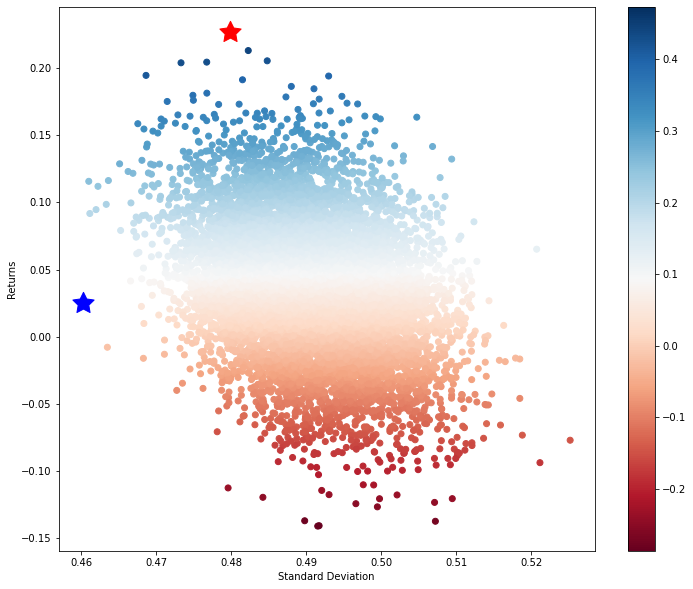

In [ ]:
width = 12
height = 10
plt.subplots(figsize=(width, height))
plt.scatter(results.stdev,results.ret,c=results.sharpe,cmap='RdBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='b',s=500)
plt.show()

## Just take a look at the stock weightings that made up those two portfolios,  along with the annualised return, annualised standard deviation and annualised Sharpe ratio.
##These are shown below firstly for the maximum Sharpe portfolio, and then for the minimum variance portfolio.

In [ ]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,/content/drive/MyDrive/S&P 100 Stocks/V.csv,/content/drive/MyDrive/S&P 100 Stocks/MO.csv,/content/drive/MyDrive/S&P 100 Stocks/WBA.csv,/content/drive/MyDrive/S&P 100 Stocks/F.csv,/content/drive/MyDrive/S&P 100 Stocks/T.csv,/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv,/content/drive/MyDrive/S&P 100 Stocks/BA.csv,/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv,/content/drive/MyDrive/S&P 100 Stocks/C.csv,/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv,/content/drive/MyDrive/S&P 100 Stocks/MDT.csv,/content/drive/MyDrive/S&P 100 Stocks/GILD.csv,/content/drive/MyDrive/S&P 100 Stocks/BAC.csv,/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv,/content/drive/MyDrive/S&P 100 Stocks/PEP.csv,/content/drive/MyDrive/S&P 100 Stocks/MRK.csv,/content/drive/MyDrive/S&P 100 Stocks/AMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MCD.csv,/content/drive/MyDrive/S&P 100 Stocks/PG.csv,/content/drive/MyDrive/S&P 100 Stocks/LOW.csv,/content/drive/MyDrive/S&P 100 Stocks/ABBV.csv,/content/drive/MyDrive/S&P 100 Stocks/COST.csv,/content/drive/MyDrive/S&P 100 Stocks/MET.csv,/content/drive/MyDrive/S&P 100 Stocks/UNP.csv,/content/drive/MyDrive/S&P 100 Stocks/BKNG.csv,/content/drive/MyDrive/S&P 100 Stocks/KHC.csv,/content/drive/MyDrive/S&P 100 Stocks/ORCL.csv,/content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv,/content/drive/MyDrive/S&P 100 Stocks/LLY.csv,/content/drive/MyDrive/S&P 100 Stocks/CAT.csv,/content/drive/MyDrive/S&P 100 Stocks/DD.csv,/content/drive/MyDrive/S&P 100 Stocks/BIIB.csv,/content/drive/MyDrive/S&P 100 Stocks/RTX.csv,/content/drive/MyDrive/S&P 100 Stocks/EMR.csv,/content/drive/MyDrive/S&P 100 Stocks/SPG.csv,/content/drive/MyDrive/S&P 100 Stocks/INTC.csv,/content/drive/MyDrive/S&P 100 Stocks/NVDA.csv,...,/content/drive/MyDrive/S&P 100 Stocks/EXC.csv,/content/drive/MyDrive/S&P 100 Stocks/GS.csv,/content/drive/MyDrive/S&P 100 Stocks/GD.csv,/content/drive/MyDrive/S&P 100 Stocks/FDX.csv,/content/drive/MyDrive/S&P 100 Stocks/CL.csv,/content/drive/MyDrive/S&P 100 Stocks/PFE.csv,/content/drive/MyDrive/S&P 100 Stocks/COP.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOG.csv,/content/drive/MyDrive/S&P 100 Stocks/ABT.csv,/content/drive/MyDrive/S&P 100 Stocks/AVGO.csv,/content/drive/MyDrive/S&P 100 Stocks/DHR.csv,/content/drive/MyDrive/S&P 100 Stocks/NFLX.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv,/content/drive/MyDrive/S&P 100 Stocks/GE.csv,/content/drive/MyDrive/S&P 100 Stocks/DUK.csv,/content/drive/MyDrive/S&P 100 Stocks/COF.csv,/content/drive/MyDrive/S&P 100 Stocks/DIS.csv,/content/drive/MyDrive/S&P 100 Stocks/JPM.csv,/content/drive/MyDrive/S&P 100 Stocks/TSLA.csv,/content/drive/MyDrive/S&P 100 Stocks/CVS.csv,/content/drive/MyDrive/S&P 100 Stocks/HON.csv,/content/drive/MyDrive/S&P 100 Stocks/AMGN.csv,/content/drive/MyDrive/S&P 100 Stocks/VZ.csv,/content/drive/MyDrive/S&P 100 Stocks/TGT.csv,/content/drive/MyDrive/S&P 100 Stocks/BK.csv,/content/drive/MyDrive/S&P 100 Stocks/LMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MS.csv,/content/drive/MyDrive/S&P 100 Stocks/AIG.csv,/content/drive/MyDrive/S&P 100 Stocks/WMT.csv,/content/drive/MyDrive/S&P 100 Stocks/BMY.csv,/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv,/content/drive/MyDrive/S&P 100 Stocks/UNH.csv,/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv,/content/drive/MyDrive/S&P 100 Stocks/MA.csv,/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv,/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv,/content/drive/MyDrive/S&P 100 Stocks/BLK.csv,/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv,/content/drive/MyDrive/S&P 100 Stocks/DOW.csv,/content/drive/MyDrive/S&P 100 Stocks/CRM.csv
9579,0.226898,0.479822,0.47288,0.010178,0.003779,0.020401,0.003801,0.001498,0.015915,0.020391,0.018984,0.0111,0.00453,0.007136,0.020775,0.002455,0.003355,0.006809,0.009837,0.014736,0.005533,0.00346,0.001026,0.017642,0.018724,0.001233,0.001038,0.003937,0.00301,0.001646,0.011301,0.019412,0.001016,0.013303,0.012403,0.000704,0.006683,0.006571,0.012878,0.016668,...,0.01775,0.000377,0.000972,0.004541,0.018755,0.008922,0.017022,0.0091

In [ ]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,/content/drive/MyDrive/S&P 100 Stocks/V.csv,/content/drive/MyDrive/S&P 100 Stocks/MO.csv,/content/drive/MyDrive/S&P 100 Stocks/WBA.csv,/content/drive/MyDrive/S&P 100 Stocks/F.csv,/content/drive/MyDrive/S&P 100 Stocks/T.csv,/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv,/content/drive/MyDrive/S&P 100 Stocks/BA.csv,/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv,/content/drive/MyDrive/S&P 100 Stocks/C.csv,/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv,/content/drive/MyDrive/S&P 100 Stocks/MDT.csv,/content/drive/MyDrive/S&P 100 Stocks/GILD.csv,/content/drive/MyDrive/S&P 100 Stocks/BAC.csv,/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv,/content/drive/MyDrive/S&P 100 Stocks/PEP.csv,/content/drive/MyDrive/S&P 100 Stocks/MRK.csv,/content/drive/MyDrive/S&P 100 Stocks/AMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MCD.csv,/content/drive/MyDrive/S&P 100 Stocks/PG.csv,/content/drive/MyDrive/S&P 100 Stocks/LOW.csv,/content/drive/MyDrive/S&P 100 Stocks/ABBV.csv,/content/drive/MyDrive/S&P 100 Stocks/COST.csv,/content/drive/MyDrive/S&P 100 Stocks/MET.csv,/content/drive/MyDrive/S&P 100 Stocks/UNP.csv,/content/drive/MyDrive/S&P 100 Stocks/BKNG.csv,/content/drive/MyDrive/S&P 100 Stocks/KHC.csv,/content/drive/MyDrive/S&P 100 Stocks/ORCL.csv,/content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv,/content/drive/MyDrive/S&P 100 Stocks/LLY.csv,/content/drive/MyDrive/S&P 100 Stocks/CAT.csv,/content/drive/MyDrive/S&P 100 Stocks/DD.csv,/content/drive/MyDrive/S&P 100 Stocks/BIIB.csv,/content/drive/MyDrive/S&P 100 Stocks/RTX.csv,/content/drive/MyDrive/S&P 100 Stocks/EMR.csv,/content/drive/MyDrive/S&P 100 Stocks/SPG.csv,/content/drive/MyDrive/S&P 100 Stocks/INTC.csv,/content/drive/MyDrive/S&P 100 Stocks/NVDA.csv,...,/content/drive/MyDrive/S&P 100 Stocks/EXC.csv,/content/drive/MyDrive/S&P 100 Stocks/GS.csv,/content/drive/MyDrive/S&P 100 Stocks/GD.csv,/content/drive/MyDrive/S&P 100 Stocks/FDX.csv,/content/drive/MyDrive/S&P 100 Stocks/CL.csv,/content/drive/MyDrive/S&P 100 Stocks/PFE.csv,/content/drive/MyDrive/S&P 100 Stocks/COP.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOG.csv,/content/drive/MyDrive/S&P 100 Stocks/ABT.csv,/content/drive/MyDrive/S&P 100 Stocks/AVGO.csv,/content/drive/MyDrive/S&P 100 Stocks/DHR.csv,/content/drive/MyDrive/S&P 100 Stocks/NFLX.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv,/content/drive/MyDrive/S&P 100 Stocks/GE.csv,/content/drive/MyDrive/S&P 100 Stocks/DUK.csv,/content/drive/MyDrive/S&P 100 Stocks/COF.csv,/content/drive/MyDrive/S&P 100 Stocks/DIS.csv,/content/drive/MyDrive/S&P 100 Stocks/JPM.csv,/content/drive/MyDrive/S&P 100 Stocks/TSLA.csv,/content/drive/MyDrive/S&P 100 Stocks/CVS.csv,/content/drive/MyDrive/S&P 100 Stocks/HON.csv,/content/drive/MyDrive/S&P 100 Stocks/AMGN.csv,/content/drive/MyDrive/S&P 100 Stocks/VZ.csv,/content/drive/MyDrive/S&P 100 Stocks/TGT.csv,/content/drive/MyDrive/S&P 100 Stocks/BK.csv,/content/drive/MyDrive/S&P 100 Stocks/LMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MS.csv,/content/drive/MyDrive/S&P 100 Stocks/AIG.csv,/content/drive/MyDrive/S&P 100 Stocks/WMT.csv,/content/drive/MyDrive/S&P 100 Stocks/BMY.csv,/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv,/content/drive/MyDrive/S&P 100 Stocks/UNH.csv,/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv,/content/drive/MyDrive/S&P 100 Stocks/MA.csv,/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv,/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv,/content/drive/MyDrive/S&P 100 Stocks/BLK.csv,/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv,/content/drive/MyDrive/S&P 100 Stocks/DOW.csv,/content/drive/MyDrive/S&P 100 Stocks/CRM.csv
7856,0.025392,0.460245,0.055171,0.014992,0.0197,0.019062,0.013252,0.007252,0.011986,0.000368,0.000338,0.000317,0.001478,0.000428,0.009607,0.010311,0.010152,0.006261,0.012917,0.018944,0.01409,0.018817,0.006863,0.015832,0.00806,0.005612,0.010384,0.00462,0.018154,0.012752,0.018671,0.004311,0.006163,0.00406,0.009234,0.004748,0.005697,0.017779,0.006837,0.002932,...,0.01408,0.001879,0.001001,0.018605,0.016468,0.007627,0.012658,0.0176

## The second approach to the optimisation – that uses the Scipy “optimize” functions.

## define a function very similar to the earlier function that calculates and returns the negative Sharpe ratio of a portfolio.

## The “bounds” just specify that each individual stock weight must be between 0 and 1, with the “args” being the arguments that is to be pass to the function to be minimise (calc_neg_sharpe)  EXCEPT the weights vector.

In [ ]:
def calc_neg_sharpe(weights, mean_returns, cov, risk_free):
    portfolio_return = 252 * np.sum(mean_returns * weights) 
    portfolio_std =  np.sqrt(252) * np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    sharpe_ratio = (portfolio_return - risk_free) / portfolio_std
    return -sharpe_ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def max_sharpe_ratio(mean_returns, cov, risk_free):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, risk_free)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    outcome = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return outcome
optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, risk_free)

In [ ]:
print(optimal_port_sharpe)

     fun: -3.0734413090108075
     jac: array([ 1.36934385e+00,  4.62329718e+00,  3.99104497e+00,  6.19815642e+00,
        2.89935508e+00,  1.47951642e+00,  6.78273347e+00, -3.74406576e-04,
        5.94360808e+00,  2.28661484e+00,  2.10105503e+00,  1.40916145e+00,
        4.17401740e+00,  1.45567438e+00,  2.10412401e+00,  2.59028882e-01,
        2.61783600e-04,  2.27362379e+00,  5.74038208e-01,  3.86078271e+00,
        4.23518398e+00, -3.15815210e-04,  5.56954616e+00,  2.31834230e+00,
        4.64832473e+00,  6.70895734e+00,  1.77990690e+00,  1.78401104e+00,
        1.50799751e-03,  4.14063126e+00,  8.35404497e+00,  2.31706724e+00,
        4.16719192e+00,  4.43060589e+00,  7.82416081e+00,  1.51198539e+00,
        2.46720776e+00, -1.19447708e-04,  2.26128805e+00,  1.57996118e-02,
        8.80729288e-01,  4.96559700e+00,  5.95268437e+00,  2.47628027e+00,
        2.32233062e+00,  2.80426317e+00,  2.32252964e+00,  3.19663548e+00,
        6.10290408e-01,  3.24295852e+00,  4.27665657e+00,  5

## When the optimization is run, the following is the outcome:

In [ ]:
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=S_and_P_100_stocks).T

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BIIB,BK,BKNG,BLK,BMY,BRK-B,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DD,DHR,DIS,DOW,DUK,EMR,EXC,F,FB,...,MA,MCD,MDLZ,MDT,MET,MMM,MO,MRK,MS,MSFT,NFLX,NKE,NVDA,ORCL,PEP,PFE,PG,PM,PYPL,QCOM,RTX,SBUX,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.0,0.0,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.33,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Use the code above to identify the minimum variance portfolio.

## The constraints remain the same, just adapt the “max_sharpe_ratio” function above, rename it to “min_variance” and change the “args” variable to hold the correct arguments that we need to pass to the new “calc_portfolio_std” that  are to be minimise.

In [ ]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std =  np.sqrt(252) * np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    return portfolio_std
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    outcome = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return outcome
min_port_variance = min_variance(mean_returns, cov)

In [ ]:
print(min_port_variance)

     fun: 0.33511009618384574
     jac: array([0.42161671, 0.36703535, 0.38839788, 0.34769496, 0.38808189,
       0.39014531, 0.71480294, 0.33536431, 0.54814362, 0.38909191,
       0.36851602, 0.335479  , 0.43231028, 0.34800762, 0.38769312,
       0.33514923, 0.33457114, 0.33523103, 0.34049195, 0.52443718,
       0.49662214, 0.35437353, 0.55327625, 0.37716198, 0.40066797,
       0.33637134, 0.33509811, 0.39215329, 0.39153161, 0.40292119,
       0.42804383, 0.38360605, 0.42817008, 0.40085324, 0.5289992 ,
       0.40030255, 0.50942102, 0.38726952, 0.44036459, 0.35248898,
       0.39563626, 0.38041124, 0.44826956, 0.38725137, 0.336835  ,
       0.36467629, 0.39373036, 0.38138787, 0.3603575 , 0.49593634,
       0.43104452, 0.47796905, 0.38601295, 0.40095106, 0.41428052,
       0.38615425, 0.52684394, 0.37923082, 0.33508617, 0.45128978,
       0.36689949, 0.46322031, 0.48614499, 0.36077301, 0.3351643 ,
       0.3819796 , 0.40110427, 0.33855094, 0.42169524, 0.34090726,
       0.36986677, 0.4

## When the optimization is run, the following is the outcome:

In [ ]:
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=S_and_P_100_stocks).T

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BIIB,BK,BKNG,BLK,BMY,BRK-B,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DD,DHR,DIS,DOW,DUK,EMR,EXC,F,FB,...,MA,MCD,MDLZ,MDT,MET,MMM,MO,MRK,MS,MSFT,NFLX,NKE,NVDA,ORCL,PEP,PFE,PG,PM,PYPL,QCOM,RTX,SBUX,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.1,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.01,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0


# 7. Portfolio weights that minimise the  Conditional Value at Risk (CVaR).

#Creating two functions that returns the parametric portfolio CVaR to a    confidence level determined by the value of the “alpha” argument.

# Scale the portfolio standard deviation by the square root of the “days” value.

# CVaR is sometimes calculated in a way that the mean returns of the portfolio are considered to be small enough that they can be entered into the equation with a zero value.

In [ ]:
def calc_portfolio_perf_CVaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = days * np.sum(mean_returns * weights) 
    portfolio_std = np.sqrt(days) *  np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    portfolio_CVaR = abs( portfolio_return - (portfolio_std  * stats.norm.pdf(stats.norm.ppf(alpha)) * alpha**-1))
    return  portfolio_return, portfolio_std , portfolio_CVaR


def simulate_random_portfolios_CVaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((4+len(mean_returns)-1, num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_CVaR = calc_portfolio_perf_CVaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] =  portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_CVaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    final_resul = pd.DataFrame(results_matrix.T,columns=['ret','stdev','CVaR'] + [data for data in csv_files])
        
    return final_resul

## The variables are defined as the before but this time with the inclusion of “days” and “alpha”.

# The variable “days”  determines the time frame over which the CVaR figure is calculated and the “alpha” variable is the significance level used for the calculation. 

# Chosen 252 days, this represent a year’s worth of trading days and the alpha of 0.05, equivalent to a 95% confidence level.

In [ ]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 10000
risk_free = 0.0
days = 252
alpha = 0.05
results = simulate_random_portfolios_CVaR(num_portfolios, mean_returns, cov, alpha, days)

In [ ]:
results.head(4)

,ret,stdev,CVaR,/content/drive/MyDrive/S&P 100 Stocks/V.csv,/content/drive/MyDrive/S&P 100 Stocks/MO.csv,/content/drive/MyDrive/S&P 100 Stocks/WBA.csv,/content/drive/MyDrive/S&P 100 Stocks/F.csv,/content/drive/MyDrive/S&P 100 Stocks/T.csv,/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv,/content/drive/MyDrive/S&P 100 Stocks/BA.csv,/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv,/content/drive/MyDrive/S&P 100 Stocks/C.csv,/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv,/content/drive/MyDrive/S&P 100 Stocks/MDT.csv,/content/drive/MyDrive/S&P 100 Stocks/GILD.csv,/content/drive/MyDrive/S&P 100 Stocks/BAC.csv,/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv,/content/drive/MyDrive/S&P 100 Stocks/PEP.csv,/content/drive/MyDrive/S&P 100 Stocks/MRK.csv,/content/drive/MyDrive/S&P 100 Stocks/AMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MCD.csv,/content/drive/MyDrive/S&P 100 Stocks/PG.csv,/content/drive/MyDrive/S&P 100 Stocks/LOW.csv,/content/drive/MyDrive/S&P 100 Stocks/ABBV.csv,/content/drive/MyDrive/S&P 100 Stocks/COST.csv,/content/drive/MyDrive/S&P 100 Stocks/MET.csv,/content/drive/MyDrive/S&P 100 Stocks/UNP.csv,/content/drive/MyDrive/S&P 100 Stocks/BKNG.csv,/content/drive/MyDrive/S&P 100 Stocks/KHC.csv,/content/drive/MyDrive/S&P 100 Stocks/ORCL.csv,/content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv,/content/drive/MyDrive/S&P 100 Stocks/LLY.csv,/content/drive/MyDrive/S&P 100 Stocks/CAT.csv,/content/drive/MyDrive/S&P 100 Stocks/DD.csv,/content/drive/MyDrive/S&P 100 Stocks/BIIB.csv,/content/drive/MyDrive/S&P 100 Stocks/RTX.csv,/content/drive/MyDrive/S&P 100 Stocks/EMR.csv,/content/drive/MyDrive/S&P 100 Stocks/SPG.csv,/content/drive/MyDrive/S&P 100 Stocks/INTC.csv,/content/drive/MyDrive/S&P 100 Stocks/NVDA.csv,...,/content/drive/MyDrive/S&P 100 Stocks/EXC.csv,/content/drive/MyDrive/S&P 100 Stocks/GS.csv,/content/drive/MyDrive/S&P 100 Stocks/GD.csv,/content/drive/MyDrive/S&P 100 Stocks/FDX.csv,/content/drive/MyDrive/S&P 100 Stocks/CL.csv,/content/drive/MyDrive/S&P 100 Stocks/PFE.csv,/content/drive/MyDrive/S&P 100 Stocks/COP.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOG.csv,/content/drive/MyDrive/S&P 100 Stocks/ABT.csv,/content/drive/MyDrive/S&P 100 Stocks/AVGO.csv,/content/drive/MyDrive/S&P 100 Stocks/DHR.csv,/content/drive/MyDrive/S&P 100 Stocks/NFLX.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv,/content/drive/MyDrive/S&P 100 Stocks/GE.csv,/content/drive/MyDrive/S&P 100 Stocks/DUK.csv,/content/drive/MyDrive/S&P 100 Stocks/COF.csv,/content/drive/MyDrive/S&P 100 Stocks/DIS.csv,/content/drive/MyDrive/S&P 100 Stocks/JPM.csv,/content/drive/MyDrive/S&P 100 Stocks/TSLA.csv,/content/drive/MyDrive/S&P 100 Stocks/CVS.csv,/content/drive/MyDrive/S&P 100 Stocks/HON.csv,/content/drive/MyDrive/S&P 100 Stocks/AMGN.csv,/content/drive/MyDrive/S&P 100 Stocks/VZ.csv,/content/drive/MyDrive/S&P 100 Stocks/TGT.csv,/content/drive/MyDrive/S&P 100 Stocks/BK.csv,/content/drive/MyDrive/S&P 100 Stocks/LMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MS.csv,/content/drive/MyDrive/S&P 100 Stocks/AIG.csv,/content/drive/MyDrive/S&P 100 Stocks/WMT.csv,/content/drive/MyDrive/S&P 100 Stocks/BMY.csv,/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv,/content/drive/MyDrive/S&P 100 Stocks/UNH.csv,/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv,/content/drive/MyDrive/S&P 100 Stocks/MA.csv,/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv,/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv,/content/drive/MyDrive/S&P 100 Stocks/BLK.csv,/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv,/content/drive/MyDrive/S&P 100 Stocks/DOW.csv,/content/drive/MyDrive/S&P 100 Stocks/CRM.csv
0,-0.040529,0.500845,1.073628,0.006872,0.003517,0.012923,0.003693,0.005217,0.016885,0.004040,0.008557,0.005077,0.018535,0.004101,0.015975,0.009440,0.005015,0.008163,0.006665,0.007841,0.002311,0.011052,0.011224,0.014390,0.007918,0.012864,0.017838,0.009307,0.014754,0.002839,0.003741,0.005272,0.009796,0.013592,0.010902,0.013643,0.005702,0.006388,0.018272,0.004213,...,0.002879,0.005844,0.009129,0.015646,0.009504,0.012242,0.011889,0.0

## Get the positon of portfolio with minimum CVaR.

In [ ]:
min_CVaR_port = results.iloc[results['CVaR'].idxmin()]
min_CVaR_port

ret                                               0.191019
stdev                                             0.468899
CVaR                                              0.776184
/content/drive/MyDrive/S&P 100 Stocks/V.csv       0.007689
/content/drive/MyDrive/S&P 100 Stocks/MO.csv      0.001094
                                                    ...   
/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv    0.020297
/content/drive/MyDrive/S&P 100 Stocks/BLK.csv     0.002258
/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv     0.020917
/content/drive/MyDrive/S&P 100 Stocks/DOW.csv     0.004488
/content/drive/MyDrive/S&P 100 Stocks/CRM.csv     0.009524
Name: 7883, Length: 103, dtype: float64

## Plot the results of each portfolio with the annualised return remaining on   the y-axis but the x-axis representing the portfolio CVaR (rather than standard deviation).

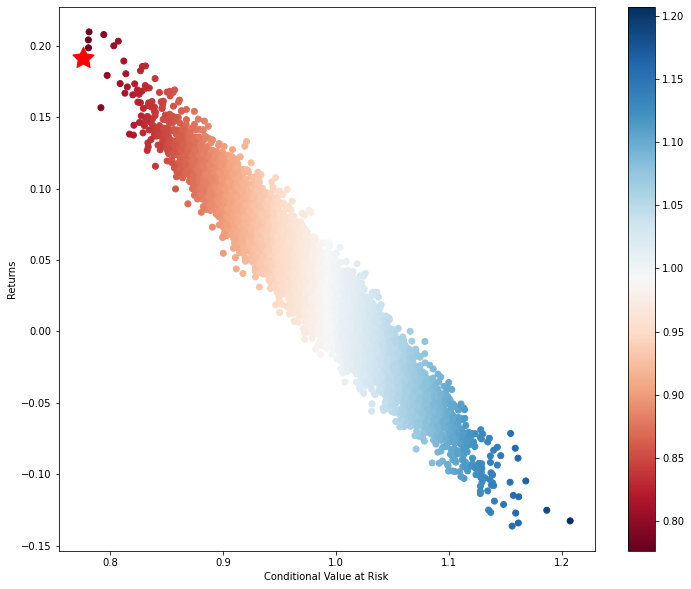

In [ ]:
width = 12
height = 10
plt.subplots(figsize=(width, height))
plt.scatter(results.CVaR,results.ret,c=results.CVaR,cmap='RdBu')
plt.xlabel('Conditional Value at Risk')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum CVaR portfolio
plt.scatter(min_CVaR_port[2],min_CVaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

## The weights of minimum CVaR portfolio.

In [ ]:
min_CVaR_port.to_frame().T

,ret,stdev,CVaR,/content/drive/MyDrive/S&P 100 Stocks/V.csv,/content/drive/MyDrive/S&P 100 Stocks/MO.csv,/content/drive/MyDrive/S&P 100 Stocks/WBA.csv,/content/drive/MyDrive/S&P 100 Stocks/F.csv,/content/drive/MyDrive/S&P 100 Stocks/T.csv,/content/drive/MyDrive/S&P 100 Stocks/CHTR.csv,/content/drive/MyDrive/S&P 100 Stocks/BA.csv,/content/drive/MyDrive/S&P 100 Stocks/ADBE.csv,/content/drive/MyDrive/S&P 100 Stocks/C.csv,/content/drive/MyDrive/S&P 100 Stocks/CSCO.csv,/content/drive/MyDrive/S&P 100 Stocks/MDT.csv,/content/drive/MyDrive/S&P 100 Stocks/GILD.csv,/content/drive/MyDrive/S&P 100 Stocks/BAC.csv,/content/drive/MyDrive/S&P 100 Stocks/SBUX.csv,/content/drive/MyDrive/S&P 100 Stocks/PEP.csv,/content/drive/MyDrive/S&P 100 Stocks/MRK.csv,/content/drive/MyDrive/S&P 100 Stocks/AMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MCD.csv,/content/drive/MyDrive/S&P 100 Stocks/PG.csv,/content/drive/MyDrive/S&P 100 Stocks/LOW.csv,/content/drive/MyDrive/S&P 100 Stocks/ABBV.csv,/content/drive/MyDrive/S&P 100 Stocks/COST.csv,/content/drive/MyDrive/S&P 100 Stocks/MET.csv,/content/drive/MyDrive/S&P 100 Stocks/UNP.csv,/content/drive/MyDrive/S&P 100 Stocks/BKNG.csv,/content/drive/MyDrive/S&P 100 Stocks/KHC.csv,/content/drive/MyDrive/S&P 100 Stocks/ORCL.csv,/content/drive/MyDrive/S&P 100 Stocks/MDLZ.csv,/content/drive/MyDrive/S&P 100 Stocks/LLY.csv,/content/drive/MyDrive/S&P 100 Stocks/CAT.csv,/content/drive/MyDrive/S&P 100 Stocks/DD.csv,/content/drive/MyDrive/S&P 100 Stocks/BIIB.csv,/content/drive/MyDrive/S&P 100 Stocks/RTX.csv,/content/drive/MyDrive/S&P 100 Stocks/EMR.csv,/content/drive/MyDrive/S&P 100 Stocks/SPG.csv,/content/drive/MyDrive/S&P 100 Stocks/INTC.csv,/content/drive/MyDrive/S&P 100 Stocks/NVDA.csv,...,/content/drive/MyDrive/S&P 100 Stocks/EXC.csv,/content/drive/MyDrive/S&P 100 Stocks/GS.csv,/content/drive/MyDrive/S&P 100 Stocks/GD.csv,/content/drive/MyDrive/S&P 100 Stocks/FDX.csv,/content/drive/MyDrive/S&P 100 Stocks/CL.csv,/content/drive/MyDrive/S&P 100 Stocks/PFE.csv,/content/drive/MyDrive/S&P 100 Stocks/COP.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOG.csv,/content/drive/MyDrive/S&P 100 Stocks/ABT.csv,/content/drive/MyDrive/S&P 100 Stocks/AVGO.csv,/content/drive/MyDrive/S&P 100 Stocks/DHR.csv,/content/drive/MyDrive/S&P 100 Stocks/NFLX.csv,/content/drive/MyDrive/S&P 100 Stocks/GOOGL.csv,/content/drive/MyDrive/S&P 100 Stocks/GE.csv,/content/drive/MyDrive/S&P 100 Stocks/DUK.csv,/content/drive/MyDrive/S&P 100 Stocks/COF.csv,/content/drive/MyDrive/S&P 100 Stocks/DIS.csv,/content/drive/MyDrive/S&P 100 Stocks/JPM.csv,/content/drive/MyDrive/S&P 100 Stocks/TSLA.csv,/content/drive/MyDrive/S&P 100 Stocks/CVS.csv,/content/drive/MyDrive/S&P 100 Stocks/HON.csv,/content/drive/MyDrive/S&P 100 Stocks/AMGN.csv,/content/drive/MyDrive/S&P 100 Stocks/VZ.csv,/content/drive/MyDrive/S&P 100 Stocks/TGT.csv,/content/drive/MyDrive/S&P 100 Stocks/BK.csv,/content/drive/MyDrive/S&P 100 Stocks/LMT.csv,/content/drive/MyDrive/S&P 100 Stocks/MS.csv,/content/drive/MyDrive/S&P 100 Stocks/AIG.csv,/content/drive/MyDrive/S&P 100 Stocks/WMT.csv,/content/drive/MyDrive/S&P 100 Stocks/BMY.csv,/content/drive/MyDrive/S&P 100 Stocks/AAPL.csv,/content/drive/MyDrive/S&P 100 Stocks/UNH.csv,/content/drive/MyDrive/S&P 100 Stocks/BRK-B.csv,/content/drive/MyDrive/S&P 100 Stocks/MA.csv,/content/drive/MyDrive/S&P 100 Stocks/QCOM.csv,/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv,/content/drive/MyDrive/S&P 100 Stocks/BLK.csv,/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv,/content/drive/MyDrive/S&P 100 Stocks/DOW.csv,/content/drive/MyDrive/S&P 100 Stocks/CRM.csv
7883,0.191019,0.468899,0.776184,0.007689,0.001094,0.005611,0.020041,0.012427,0.001832,0.005078,0.011574,0.00438,0.012614,0.000136,0.018993,0.005398,0.014654,0.006208,0.019351,0.010645,0.017517,0.015683,0.00288,0.002825,0.019164,0.013925,0.019148,0.006665,0.001937,0.013798,0.008965,0.009336,0.002199,0.010472,0.003471,0.003129,0.014932,0.003744,0.001595,0.006284,...,0.005888,0.004216,0.007311,0.000602,0.006174,0.003861,0.006953,0.0

## Location positon of portfolio with minimum CVaR

In [ ]:
min_CVaR_port = results.iloc[results['CVaR'].idxmin()]
min_CVaR_port

ret                                               0.191019
stdev                                             0.468899
CVaR                                              0.776184
/content/drive/MyDrive/S&P 100 Stocks/V.csv       0.007689
/content/drive/MyDrive/S&P 100 Stocks/MO.csv      0.001094
                                                    ...   
/content/drive/MyDrive/S&P 100 Stocks/TMUS.csv    0.020297
/content/drive/MyDrive/S&P 100 Stocks/BLK.csv     0.002258
/content/drive/MyDrive/S&P 100 Stocks/JNJ.csv     0.020917
/content/drive/MyDrive/S&P 100 Stocks/DOW.csv     0.004488
/content/drive/MyDrive/S&P 100 Stocks/CRM.csv     0.009524
Name: 7883, Length: 103, dtype: float64

## Plot the result of the minimum VaR portfolio on a chart making the y-axis as return and making the x-axis as standard deviation as it were before.

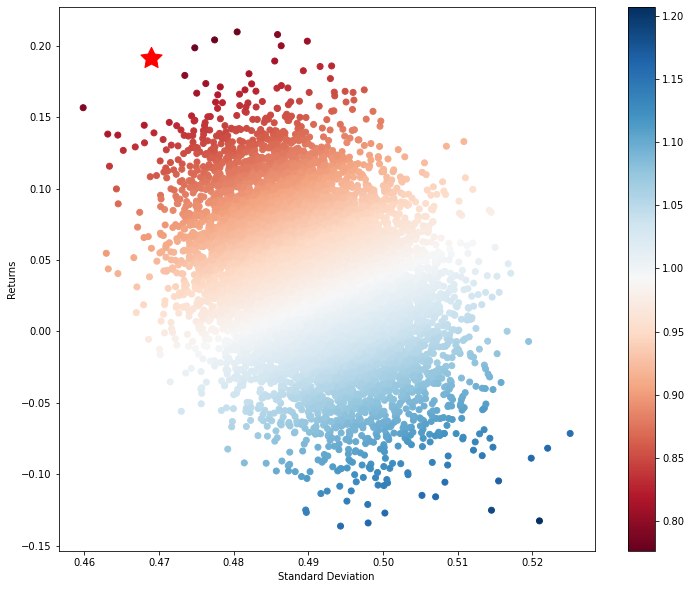

In [ ]:
width = 12
height = 10
plt.subplots(figsize=(width, height))
plt.scatter(results.stdev,results.ret,c=results.CVaR,cmap='RdBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_CVaR_port[1],min_CVaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

## Note: Here CVaR falls when portfolio returns increases.

## Sharpe ratio increases when portfolio returns increase.

## Increase in portfolio standard deviation increases CVaR as well  but decreases the Sharpe ratio.

## Whe CVaR is aximise, Sharpe ratio minimises.

## “minimizing_CVaR” function perform as “maximum_sharpe_ratio”

In [ ]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
def calc_portfolio_CVaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = days * np.sum(mean_returns * weights) 
    portfolio_std =  np.sqrt(days) * np.sqrt(np.dot(weights.T, np.dot(cov, weights))) 
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var
def min_CVaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_CVaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_CVaR = min_CVaR(mean_returns, cov, alpha, days)

In [ ]:
min_port_CVaR

     fun: 2.7118172929441187e-08
     jac: array([-0.16880561,  1.43402039,  1.24283689,  2.11808927,  0.6321024 ,
       -0.01764888,  1.72496645, -0.60042896,  1.71286   ,  0.38698176,
        0.2334192 ,  0.18122072,  1.14463063, -0.0310176 ,  0.20498424,
       -0.41569999, -0.80699817,  0.33850984, -0.25824494,  0.69752513,
        0.92946742, -0.63886651,  1.55615545,  0.40654965,  1.32769103,
        2.52373046,  0.25350791,  0.07870066, -0.76330062,  1.31772538,
        2.87031628,  0.53142291,  1.11392255,  1.4008171 ,  2.46225363,
        0.09656528,  0.3210496 , -0.76205481,  0.16552786, -0.51532507,
       -0.22176249,  1.58770967,  1.90672998,  0.39293993,  0.45724171,
        0.64144796,  0.32281905,  0.70415593, -0.30482785,  0.50954662,
        1.21385083,  1.71412885,  0.27372716,  2.17366932,  1.91793247,
       -0.15454618,  0.79428011,  1.30295511,  0.82381566,  0.92845859,
        0.41324247,  1.49257993,  1.46770915,  2.08959968,  0.49338472,
        0.60144852,  

## When the optimization is run this is the following results:

In [ ]:
pd.DataFrame([round(x,2) for x in min_port_CVaR['x']],index=S_and_P_100_stocks).T

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BIIB,BK,BKNG,BLK,BMY,BRK-B,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DD,DHR,DIS,DOW,DUK,EMR,EXC,F,FB,...,MA,MCD,MDLZ,MDT,MET,MMM,MO,MRK,MS,MSFT,NFLX,NKE,NVDA,ORCL,PEP,PFE,PG,PM,PYPL,QCOM,RTX,SBUX,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
0,0.01,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.02,0.01,0.0,0.0,0.0,0.03,0.0,0.0,0.01,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.03,0.01,0.02,0.01,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.02,0.0,0.01,0.23,0.01,0.0,0.0,0.01,0.0,0.0,0.19,0.0,0.0,0.01,0.0,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.02,0.02,0.01,0.0,0.0,0.02,0.01
